# INTRODUCTION

## Overview
In this project, we will be analysing the Kings county housing dataset
Our objective is to use linear regression techniques to develop a model which can be used to predict the price of a home not already described in our original data set, based on the input of other data related to the house. 

I am also interested in exploring the variation of housing prices across georgraphic regions within Kings county, to see if any patterns can be identified. 

Kings count is a county in Washington state. The western portion of it encompasses the city of Seattle. The data set contains sale information related to specific houes. It has around 21,000 records. 


# OBTAIN

## Importing libraries and dataset
First off, lets import the modules we will require for this analysis, as well as the dataset itself. df0 will be our clean, unmodified dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import statsmodels.api as sm
import warnings; warnings.simplefilter('ignore')
from math import sqrt

pd.options.display.float_format = '{:,.2f}'.format
mpl.rcParams['figure.figsize'] = (20,20)

   
df0 = pd.read_csv('kc_house_data.csv')   

## Preliminary Overview
Lets get an overview of our dataset with standard python methods. 

In [2]:
display(df0.head())
display(df0.describe())
print(type(df0.info()))

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221,900.00         3       1.00         1180   
1  6414100192   12/9/2014 538,000.00         3       2.25         2570   
2  5631500400   2/25/2015 180,000.00         2       1.00          770   
3  2487200875   12/9/2014 604,000.00         4       3.00         1960   
4  1954400510   2/18/2015 510,000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00         nan  0.00  ...      7        1180            0.0   
1      7242    2.00        0.00  0.00  ...      7        2170          400.0   
2     10000    1.00        0.00  0.00  ...      6         770            0.0   
3      5000    1.00        0.00  0.00  ...      7        1050          910.0   
4      8080    1.00        0.00  0.00  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0     1955          0.00    98178 47.51 -122.26           1340        5650  
1     1951      1,991.00    98125 47.72 -122.32           1690        7639  
2     1933           nan    98028 47.74 -122.23           2720        8062  
3     1965          0.00    98136 47.52 -122.39           1360        5000  
4     1987          0.00    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

id        price  bedrooms  bathrooms  sqft_living  \
count        21,597.00    21,597.00 21,597.00  21,597.00    21,597.00   
mean  4,580,474,287.77   540,296.57      3.37       2.12     2,080.32   
std   2,876,735,715.75   367,368.14      0.93       0.77       918.11   
min       1,000,102.00    78,000.00      1.00       0.50       370.00   
25%   2,123,049,175.00   322,000.00      3.00       1.75     1,430.00   
50%   3,904,930,410.00   450,000.00      3.00       2.25     1,910.00   
75%   7,308,900,490.00   645,000.00      4.00       2.50     2,550.00   
max   9,900,000,190.00 7,700,000.00     33.00       8.00    13,540.00   

          sqft_lot    floors  waterfront      view  condition     grade  \
count    21,597.00 21,597.00   19,221.00 21,534.00  21,597.00 21,597.00   
mean     15,099.41      1.49        0.01      0.23       3.41      7.66   
std      41,412.64      0.54        0.09      0.77       0.65      1.17   
min         520.00      1.00        0.00      0.00       1.00      3.00   
25%       5,040.00      1.00        0.00      0.00       3.00      7.00   
50%       7,618.00      1.50        0.00      0.00       3.00      7.00   
75%      10,685.00      2.00        0.00      0.00       4.00      8.00   
max   1,651,359.00      3.50        1.00      4.00       5.00     13.00   

       sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
count   21,597.00 21,597.00     17,755.00 21,597.00 21,597.00 21,597.00   
mean     1,788.60  1,971.00         83.64 98,077.95     47.56   -122.21   
std        827.76     29.38        399.95     53.51      0.14      0.14   
min        370.00  1,900.00          0.00 98,001.00     47.16   -122.52   
25%      1,190.00  1,951.00          0.00 98,033.00     47.47   -122.33   
50%      1,560.00  1,975.00          0.00 98,065.00     47.57   -122.23   
75%      2,210.00  1,997.00          0.00 98,118.00     47.68   -122.12   
max      9,410.00  2,015.00      2,015.00 98,199.00     47.78   -121.31   

       sqft_living15  sqft_lot15  
count      21,597.00   21,597.00  
mean        1,986.62   12,758.28  
std           685.23   27,274.44  
min           399.00      651.00  
25%         1,490.00    5,100.00  
50%         1,840.00    7,620.00  
75%         2,360.00   10,083.00  
max         6,210.00  871,200.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
<class 'None

## Value Counts Report
Lets gather some more information about our data set. The function below takes the dataset and returns a dataframe with the following information for each column:

1. The data type of the columns
2. The missing values in the column, expressed as a percentage of the total records. 
3. The number of unique values in the column
4. The most common value in column
5. The percentage of the column's values equal to the most common value in that column
6. The second, third...nth most common values and the percentage of the column that consists of them

In [3]:
def report1 (dataframe,n_highest_counts):
    ''' Returns a dataframe reporting on the value counts of input frame. '''
    
    master={}
        
    for column in dataframe.columns:
        
        master[column]={}
        col_dict = master[column]
        col_dict['type'] = str(dataframe[column].dtypes)
        col_dict['% empty'] = round(((len(dataframe)-dataframe[column].count())/len(dataframe))*100,2)
        col_dict['unique values'] = dataframe[column].nunique()
        
        x = 1
        series1 = dataframe[column].value_counts().head(n_highest_counts)
        series1 = round((series1/len(dataframe)) * 100, 2)        
        
        for index,item in series1.items():
            value_prop = str(x) + 'nth_value_%'
            value_name = str(x) + 'nth_value'
            col_dict[value_name] = index
            col_dict[value_prop] = item
            x += 1
        
    df_report=pd.DataFrame.from_dict(master,orient='index')
    df_report.sort_values(['1nth_value_%'],ascending=False,inplace=True)
        
    return df_report

df_report = report1(df0,10)
display(df_report)

type  % empty  unique values 1nth_value  1nth_value_%  \
view           float64     0.29              5       0.00         89.93   
waterfront     float64    11.00              2       0.00         88.32   
yr_renovated   float64    17.79             70       0.00         78.77   
condition        int64     0.00              5          3         64.92   
sqft_basement   object     0.00            304        0.0         59.39   
floors         float64     0.00              6       1.00         49.42   
bedrooms         int64     0.00             12          3         45.49   
grade            int64     0.00             11          7         41.55   
bathrooms      float64     0.00             29       2.50         24.90   
zipcode          int64     0.00             70      98103          2.79   
yr_built         int64     0.00            116       2014          2.59   
sqft_lot15       int64     0.00           8682       5000          1.98   
sqft_lot         int64     0.00           9776       5000          1.66   
sqft_above       int64     0.00            942       1300          0.98   
sqft_living15    int64     0.00            777       1540          0.91   
price          float64     0.00           3622 350,000.00          0.80   
date            object     0.00            372  6/23/2014          0.66   
sqft_living      int64     0.00           1034       1300          0.64   
long           float64     0.00            751    -122.29          0.53   
lat            float64     0.00           5033      47.66          0.08   
id               int64     0.00          21420  795000620          0.01   

               2nth_value  2nth_value_%  3nth_value  3nth_value_%  4nth_value  \
view                 2.00          4.43        3.00          2.35        1.00   
waterfront           1.00          0.68         NaN           nan         NaN   
yr_renovated     2,014.00          0.34    2,003.00          0.14    2,013.00   
condition               4         26.29           5          7.88           2   
sqft_basement           ?          2.10       600.0          1.00       500.0   
floors               2.00         38.13        1.50          8.84        3.00   
bedrooms                4         31.87           2         12.78           5   
grade                   8         28.08           9         12.11           6   
bathrooms            1.00         17.83        1.75         14.11        2.25   
zipcode             98038          2.73       98115          2.70       98052   
yr_built             2006          2.10        2005          2.08        2004   
sqft_lot15           4000          1.65        6000          1.33        7200   
sqft_lot             6000          1.34        4000          1.16        7200   
sqft_above           1010          0.97        1200          0.95        1220   
sqft_living15        1440          0.90        1560          0.89        1500   
price          450,000.00          0.80  550,000.00          0.74  500,000.00   
date            6/25/2014          0.61   6/26/2014          0.61    7/8/2014   
sqft_living          1400          0.63        1440          0.62        1660   
long              -122.30          0.51     -122.36          0.48     -122.29   
lat                 47.55          0.08       47.53          0.08       47.68   
id             1825069031          0.01  2019200220          0.01  7129304540   

               ...  6nth_value 6nth_value_%  7nth_value 7nth_value_%  \
view           ...         NaN          nan         NaN          nan   
waterfront     ...         NaN          nan         NaN          nan   
yr_renovated   ...    2,000.00         0.13    2,005.00         0.13   
condition      ...         NaN          nan         NaN          nan   
sqft_basement  ...       800.0         0.93       400.0         0.85   
floors         ...        3.50         0.03         NaN          nan   
bedrooms       ...           1         0.91           7         0.18   
grade   

# SCRUB
Lets clean our dataset and get rid of useless fluff. To keep track of how much of the original data is left over, let us define a function which we can call after each step in the cleaning process to make sure we arent getting rid of too much data. This function will tell us what percent of the number of rows in the original dataframe still remain in our cleaned and modified dataframe

In [4]:
def row_loss(df_base,df_current):
    ''' Returns list describing difference in row counts between two input frames'''
    
    rows_dropped = len(df_base) - len(df_current)
    rows_left = len(df_current)
    row_loss_perc = ((len(df_base) - rows_dropped)/len(df_base)) * 100
    row_loss_perc = round(row_loss_perc,2)
    
    metrics = [rows_dropped,rows_left,row_loss_perc]
    
    return metrics

def loss_report (df_base,df_current):
    ''' Prints row loss report '''
    stats_list = row_loss(df_base,df_current)
    
    for x in stats_list:
        x = str(x)
      
    string = "Rows Dropped: {}    Rows Left: {}   Percentage Remaining: {}".format(stats_list[0],stats_list[1],stats_list[2])
    
    print(string)
    

## PHASE 1 - Permanent Modifictions. 
In this phase of the scrubbing process, we will recast data types, deal with duplicate values, missing values and placeholders. These are modification to the dataset that must be made in any scenario, and we probably wont need to tweak these at any point. The end result of phase one will be dataframe that we will process further, but will serve as a stable base for us to try different processing techniques down the line. 

Lets create two list: a primary_removals list which will contain features we definitely want to drop, and a secondary_removals list where we will add features we may want to drop after our first model. Will will gather the column names in these lists as we go, and at the end wil will creat a dataframe (df1) that reflects the changes made in phase one. 

In [5]:
primary_removals = []
secondary_removals = []

df1 = df0.copy()

### Recasting Data Types
We now take a closer look at which columns have a datatype of 'object', and whether we may turn them into numbers. 

In [6]:
df_objects = list(df_report[df_report['type'] == 'object'].index)
display(df_objects)

['sqft_basement', 'date']

Lets turn these into more appropriate data types.

In [7]:
df1['date'] = pd.to_datetime(df1['date'])
#df1['sqft_basement'] = pd.to_numeric(df1['sqft_basement'])

I commented out the line to recast sqft_basement. Turns out it has some problematic values in it. Lets hold off for now, and revisit later. 

As for the 'date' column, on second thought, lets drop it. We need to convert all our data into numeric form. We could conceivably do this with the date column but it would require some engineering. But if we think about it, the date column is probably not very useful to us in this case. It describes the date that the house in question was sold. I dont really see how this can have any significant effect on the price of a house. Lets at least drop it for now and perhaps we can retrain our model with a modified version of it later to see if it makes any difference. 

In [8]:
df1 = df1.sort_values('date',ascending=True)
df1 = df1.drop(['date'],axis=1)

### Duplicate Records

We would like to assume that each row in the dataset refers to just one house. The 'id' column is described as being the unique identifier for a house. However, even though the dataset is 21597 records long, 'id' has 21420 unique values, and no missing values. This might indicate the existence of duplicates. 

The function below returns a list of id's that occur more than once in the dataframe. We will use this list to filter the dataframe to find all rows with those id numbers and sort them by id number so we can observe the rows with the same Id numbers one on top of the other. If we see that the rest of the data in both rows with the same ID is also the same, we can confirm that these are true duplicates. 

In [9]:
def duplicates_list (dataframe,column):
    '''Returns list of index labels of duplicate column values'''
    
    df_id_Counts = dataframe[column].value_counts()
    repeats = df_id_Counts[df_id_Counts > 1]
    repeats = list(repeats.index)
    
    return repeats

repeated_values = duplicates_list(df1,'id')

df_dups = df1[df1['id'].isin(repeated_values)]
df_dups.sort_values(by='id',inplace=True)

dups_count = len(df_dups) - len(repeated_values)
percent_of_duplicates = dups_count/len(df1) 
percent_of_duplicates = round(percent_of_duplicates *100,2)
                         
print("{} ( {}% ) of the rows in the dataframe are duplicate records".format(dups_count,percent_of_duplicates))
display(df_dups.head(10))


177 ( 0.82% ) of the rows in the dataframe are duplicate records


id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2495     1000102 300,000.00         6       3.00         2400      9373   
2494     1000102 280,000.00         6       3.00         2400      9373   
16800    7200179 150,000.00         2       1.00          840     12750   
16801    7200179 175,000.00         2       1.00          840     12750   
11421  109200390 245,000.00         3       1.75         1480      3900   
11422  109200390 250,000.00         3       1.75         1480      3900   
12406  123039336 244,900.00         1       1.00          620      8261   
12405  123039336 148,000.00         1       1.00          620      8261   
7785   251300110 225,000.00         3       2.25         2510     12013   
7786   251300110 358,000.00         3       2.25         2510     12013   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
2495     2.00        0.00  0.00          3      7        2400           0.0   
2494     2.00         nan  0.00          3      7        2400           0.0   
16800    1.00        0.00  0.00          3      6         840           0.0   
16801    1.00        0.00  0.00          3      6         840           0.0   
11421    1.00        0.00  0.00          4      7        1480           0.0   
11422    1.00        0.00  0.00          4      7        1480           0.0   
12406    1.00        0.00  0.00          3      5         620           0.0   
12405    1.00        0.00  0.00          3      5         620           0.0   
7785     2.00        0.00  0.00          3      8        2510           0.0   
7786     2.00        0.00  0.00          3      8        2510           0.0   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
2495       1991          0.00    98002 47.33 -122.21           2060   
2494       1991          0.00    98002 47.33 -122.21           2060   
16800      1925          0.00    98055 47.48 -122.21           1480   
16801      1925           nan    98055 47.48 -122.21           1480   
11421      1980          0.00    98023 47.30 -122.37           1830   
11422      1980          0.00    98023 47.30 -122.37           1830   
12406      1939           nan    98106 47.51 -122.36           1180   
12405      1939          0.00    98106 47.51 -122.36           1180   
7785       1988          0.00    98003 47.35 -122.31           1870   
7786       1988          0.00    98003 47.35 -122.31           1870   

       sqft_lot15  
2495         7316  
2494         7316  
16800        6969  
16801        6969  
11421        6956  
11422        6956  
12406        8244  
12405        8244  
7785         8017  
7786         8017

As we can see, the duplicate ids refer to the same houses as they refer to houses with the same number of bedrooms, bathrooms, square footage etc. Given that only 0.82% of the rows of the dataset, we can safely discard them. Once we have done that, lets set the id number as the index of the dataframe, since now it truly is a unique identifier. This should help us with merges later on and maintain the integrity of our data. Lets also take a look at where our row loss metric stands


In [10]:
df1 = df1.drop_duplicates('id')
df1.set_index('id',inplace=True)

print(loss_report(df0,df1))

Rows Dropped: 177    Rows Left: 21420   Percentage Remaining: 99.18
None


### Placeholders and Missing Values

Finding missing values is simple enough: we can use native python methods to examine the null values in a given dataframe or series. But as we know, oftentimes datasets have palceholder values that are actually null values, although not encoded as such. Finding these is trickier. One way is to look at the counts of unique values in each dataframe column to see if anything jumps out.

Forunately, our custom df_report which we got from our report1 function will come in handy to find out if any particular values constitute and abormally large proportion of a gievn dataframe column. This could be an indication that there is a placeholder value that will skew our results. 

Lets take a look at the report again. 

In [11]:
display(df_report)     

type  % empty  unique values 1nth_value  1nth_value_%  \
view           float64     0.29              5       0.00         89.93   
waterfront     float64    11.00              2       0.00         88.32   
yr_renovated   float64    17.79             70       0.00         78.77   
condition        int64     0.00              5          3         64.92   
sqft_basement   object     0.00            304        0.0         59.39   
floors         float64     0.00              6       1.00         49.42   
bedrooms         int64     0.00             12          3         45.49   
grade            int64     0.00             11          7         41.55   
bathrooms      float64     0.00             29       2.50         24.90   
zipcode          int64     0.00             70      98103          2.79   
yr_built         int64     0.00            116       2014          2.59   
sqft_lot15       int64     0.00           8682       5000          1.98   
sqft_lot         int64     0.00           9776       5000          1.66   
sqft_above       int64     0.00            942       1300          0.98   
sqft_living15    int64     0.00            777       1540          0.91   
price          float64     0.00           3622 350,000.00          0.80   
date            object     0.00            372  6/23/2014          0.66   
sqft_living      int64     0.00           1034       1300          0.64   
long           float64     0.00            751    -122.29          0.53   
lat            float64     0.00           5033      47.66          0.08   
id               int64     0.00          21420  795000620          0.01   

               2nth_value  2nth_value_%  3nth_value  3nth_value_%  4nth_value  \
view                 2.00          4.43        3.00          2.35        1.00   
waterfront           1.00          0.68         NaN           nan         NaN   
yr_renovated     2,014.00          0.34    2,003.00          0.14    2,013.00   
condition               4         26.29           5          7.88           2   
sqft_basement           ?          2.10       600.0          1.00       500.0   
floors               2.00         38.13        1.50          8.84        3.00   
bedrooms                4         31.87           2         12.78           5   
grade                   8         28.08           9         12.11           6   
bathrooms            1.00         17.83        1.75         14.11        2.25   
zipcode             98038          2.73       98115          2.70       98052   
yr_built             2006          2.10        2005          2.08        2004   
sqft_lot15           4000          1.65        6000          1.33        7200   
sqft_lot             6000          1.34        4000          1.16        7200   
sqft_above           1010          0.97        1200          0.95        1220   
sqft_living15        1440          0.90        1560          0.89        1500   
price          450,000.00          0.80  550,000.00          0.74  500,000.00   
date            6/25/2014          0.61   6/26/2014          0.61    7/8/2014   
sqft_living          1400          0.63        1440          0.62        1660   
long              -122.30          0.51     -122.36          0.48     -122.29   
lat                 47.55          0.08       47.53          0.08       47.68   
id             1825069031          0.01  2019200220          0.01  7129304540   

               ...  6nth_value 6nth_value_%  7nth_value 7nth_value_%  \
view           ...         NaN          nan         NaN          nan   
waterfront     ...         NaN          nan         NaN          nan   
yr_renovated   ...    2,000.00         0.13    2,005.00         0.13   
condition      ...         NaN          nan         NaN          nan   
sqft_basement  ...       800.0         0.93       400.0         0.85   
floors         ...        3.50         0.03         NaN          nan   
bedrooms       ...           1         0.91           7         0.18   
grade   

#### Analysis

We will now analyze these resulte. We will then create two list: a primary_removals list which will contain features we definitely want to drop, and a secondary_removals list where we will add features we 
From the preceeding, we can make the following observations:

1. "View" is a binary categorical variable, indicating whether a house has been viewed or not. 90% of the 'view' column has a value of '0', meaning 90% of the houses have not been viewed. I wonder how useful this really is. Lets add it to our secondary_removals list. 

2. Similary, 88% of 'waterfront' is also '0'. It seems most likely that waterfront is a binary categorical variable, i.e. a house either is not on the waterfront (in which case ot gets a 'o' value), or it is (in which case it gets '1'). Perhaps being on the waterfront makes a house more valuable, and if we build a model that takes into account whether a house is on the waterfront it may be more accurate. However, 11% of the data is missing. Lets fill those missing values with 0, since most houses likely are not waterfront adjacent. Lets also add this to our secondary list. 

3. year renovated seems like it should be deleted. 80% of the values are '0'. 17% of the values are missing. Lets add this to primary_removals. 

4. condition again seems to be a categorical variable. the values range from 1 to 5, and its probably a way of saying "on a scale of 1 to 5 what is the condition of the property". The most frequent value is 3, occuring 65% of the time, then 4 at 26% of the time. It tapers of before and after. If I had to guess, these values are normally distributed. 3 is right down the middle of the scale, and it makes sense that most houses would be in average condition, and more extreme conditions are less and less likely. We can double check this with a histogram. But we definitely want to retain condition in our feature set. 

5. sqft_basement might be of questionable utility. Around 60% of the values are '0'. 2% are '?'. The remaining values are in increments of 100, which is highly unlikely for a quantity that one would expect to be more continuos and varying (compare with other square foot based columns). Lets add this to secondary_removals, but also change the placeholder values. 

6. Around 50% of houses have only 1 floor. 40% have 2 floors. It goes down from there. This makes sense. Lets leave this feature in place. 

7. A large portion of houses(45%) have three bedrooms. 32% have 4 bedrooms. The rest have lesser or more. This also in line with what we would expect. 3 seems like the numebr of bedrooms we would expect most houses to have, so this is not unusual. Lets keep this feature

8. 7 is the most common value for grade at 42%. Given that grade ranges from 3 to 13 and 7 is kind of in the middle, this also makes sense. Again, one would expect most houses to be graded average. 

9. Bathrooms also does not seem to have any glaring outliers, and seems in line with our expectations for the most common number of bathrooms across homes. 

10. Lastly, we must remove the one value from the dataframe where price is 0. It must be bad data, and it will disrupt our models later on. 


In [12]:
primary_removals = ['yr_renovated']
secondary_removals = ['view','sqft_basement']

df1=df1.drop(primary_removals,axis=1)
df1 = df1[df1['price'] != 0]

df1['waterfront'] = df1['waterfront'].fillna(value=0)
df1['sqft_basement'].replace('?',0,inplace=True)
df1['sqft_basement'] = pd.to_numeric(df1['sqft_basement'])


display(df1.head())
print(df1.info())
print(row_loss(df0,df1))

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                          
2202500290 435,000.00         4       1.00         1450      8800    1.00   
7853361370 555,000.00         4       2.50         3310      6500    2.00   
7197300105 550,000.00         4       2.50         1940     10500    1.00   
3438501320 295,000.00         2       2.50         1630      1368    2.00   
472000620  790,000.00         3       2.50         2600      4750    1.00   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
2202500290        0.00  0.00          4      7        1450           0.00   
7853361370        0.00  0.00          3      8        3310           0.00   
7197300105        0.00  0.00          4      7        1140         800.00   
3438501320        0.00  0.00          3      7        1280         350.00   
472000620         0.00  0.00          4      9        1700         900.00   

            yr_built  zipcode   lat    long  sqft_living15  sqft_lot15  
id                                                                      
2202500290      1954    98006 47.57 -122.14           1260        8942  
7853361370      2012    98065 47.52 -121.87           2380        5000  
7197300105      1976    98052 47.68 -122.11           2200       10500  
3438501320      2009    98106 47.55 -122.36           1590        2306  
472000620       1951    98117 47.68 -122.40           2380        4750

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 2202500290 to 9106000005
Data columns (total 18 columns):
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null float64
yr_built         21420 non-null int64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(10)
memory usage: 3.1 MB
None
[177, 21420, 99.18]


## Phase 2 - Transient Modifications
In this phase of the data scrubbing process, we will make modifications that we may want to alter down the line. We will scrub for outliers, normalize some features, drop features with high colinearity and scale our featurs. Since we may want to change which features we apply these transformation to, and how to apply them. Which is why we will try to abstract our process out into functions that we can easily reuse when the time comes to try to improve our models by trying different processing techniques on our dataset. We will collect the lists of columns to remove and process in the dictionary phase2_take1.

Lets begin our exploration of the dataset with a scatter mattrix, to get some insight into outliers and categorical variables. We will also make a copy of the dataframe as we have modified it thus far, because we may want to tweak what we do next in a future iteration of this process. 

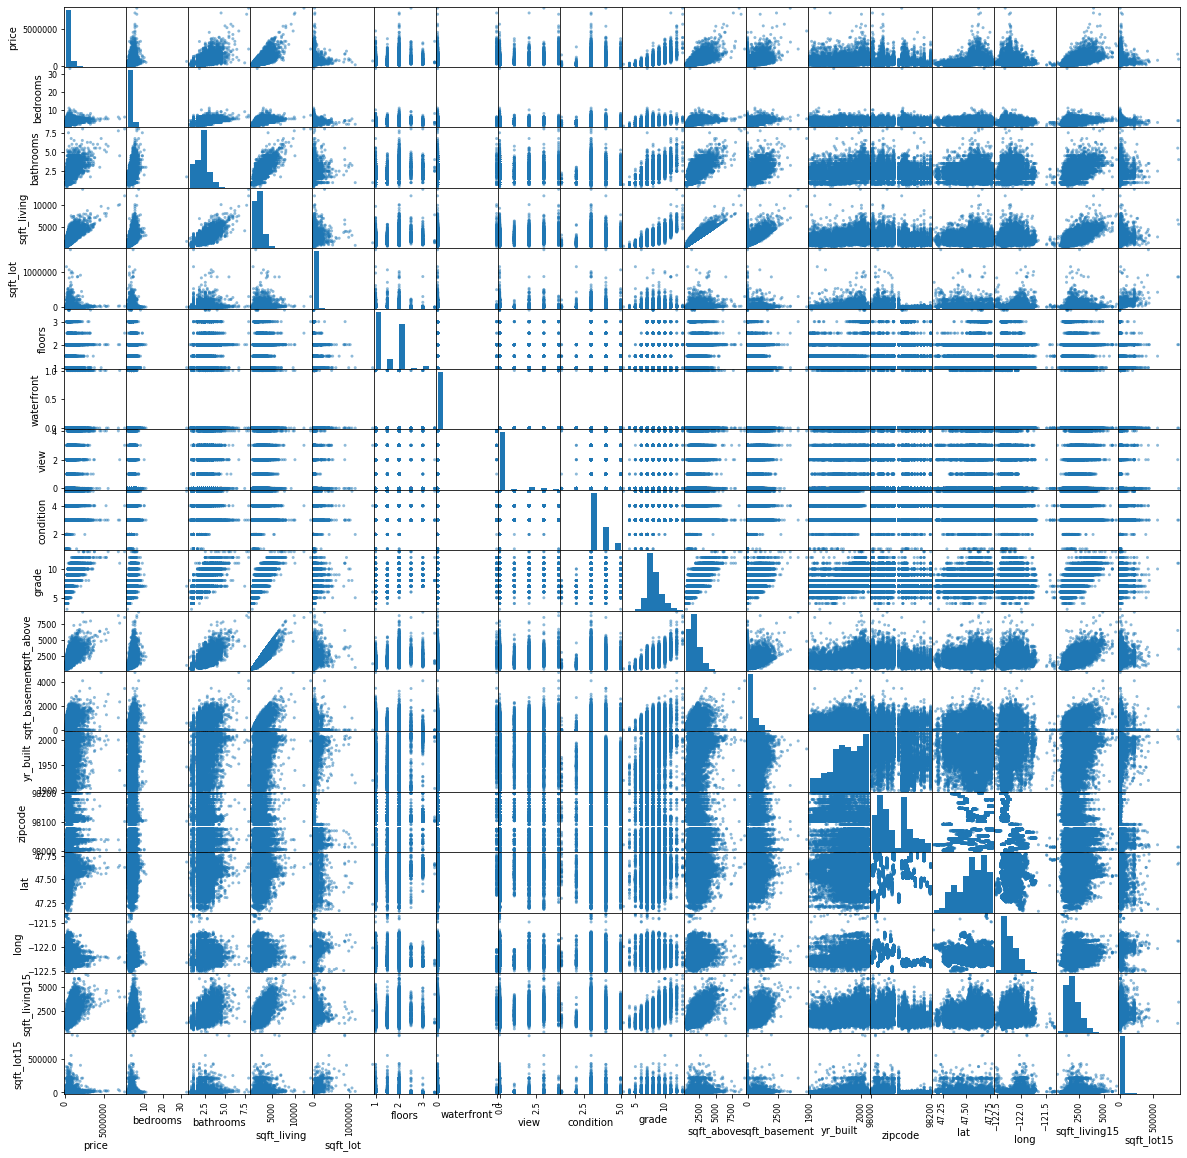

In [13]:
df2 = df1.copy()

phase2_take1 = {}

pd.plotting.scatter_matrix(df1,figsize=(20,20)); 

### Outliers
I want to first remove outliers before scaling data. This seems like the correct approach, because I feel like scaling the data with outliers will produce skewed distributions which I will have to recorrect for outliers anyways, and end up removing the same outlying values I will now. I also want to use min-max scaling as I understand it is better at bringing data into more homogenous scales across columns.

First lets draw boxplots for all our columns to identify which columns we should cull outliers from.

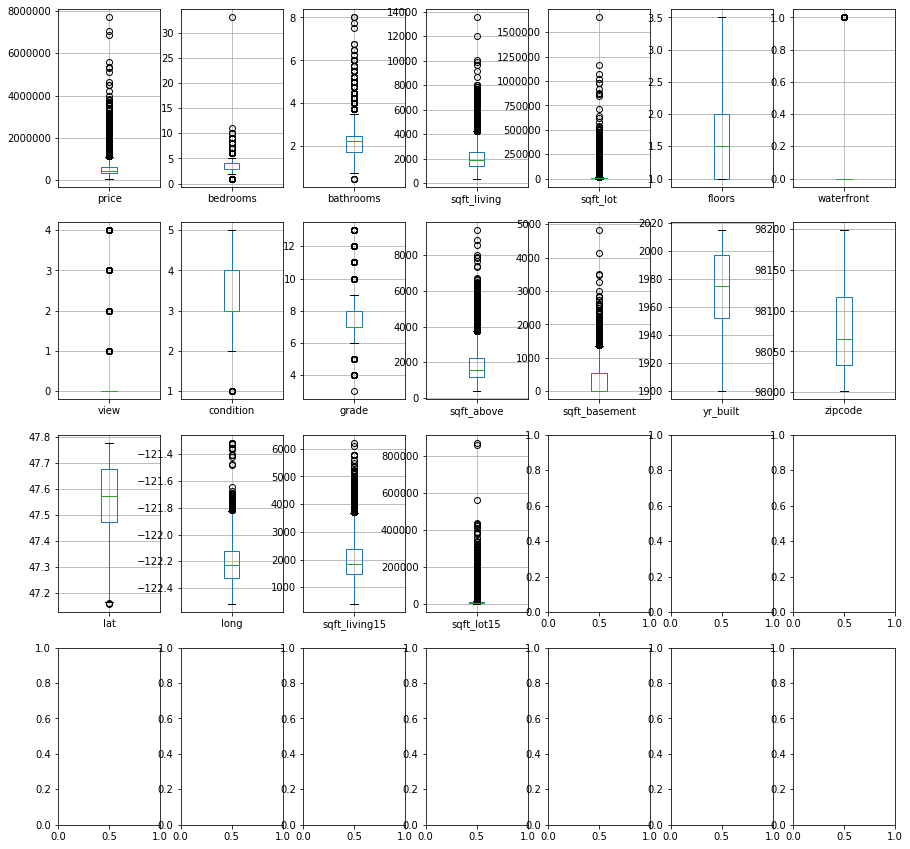

In [14]:
def box_matrix (dataframe):
    ''' generates boxplost for all columns in dataframe'''
    df = dataframe
    col_nums = len(df.columns)
    if col_nums % 7 > 0:
        chart_cols = int(round((col_nums/7)+1,0))
    else:
        chart_cols = int(round((col_nums/7),0))

    figure, ax = plt.subplots(chart_cols,7,figsize=(15,15))

    ax = ax.reshape(-1)

    for i,col in enumerate(df.columns):
        df.boxplot(column=col,ax=ax[i])
     

box_matrix(df2)

Now lets write a couple of functions to cull values. 
To the first one we will pass a dictionary of columns and the highest values we want to retain in each column, which we specifiy manually for each column. 

The second function removes all outliers above a certain percentile for all columns passed into it in list form. 

The third one will use the second function with different threhold values to chart the data loss that results at each threshold, and allow us to identify an optimum threshold. 

In [15]:
def rm_outliers_dict (dataframe, culling_dict):
    ''' Remove values above specified threshold specified for each column'''
    outliers_list = []
    for col in culling_dict.keys():
        outlier_indices = list(dataframe[dataframe[col] >= culling_dict[col]].index)
        outliers_list = outliers_list + outlier_indices
        
    unique_set = set(outliers_list)
    outliers_list = list(unique_set)
    
    dataframe = dataframe.drop(labels=outliers_list)        
    
    return dataframe

def rm_outliers_threshold (dataframe, columns, threshold):
    '''Removes values above specified quantile threshold for all columns passed as list'''
    outliers_list = []
    for col in columns:
        outlier_indices = list(dataframe[dataframe[col] >= dataframe[col].quantile(threshold)].index)
        outliers_list = outliers_list + outlier_indices
        
    unique_set = set(outliers_list)
    outliers_list = list(unique_set)
    
    dataframe = dataframe.drop(labels=outliers_list) 
    return dataframe

def cull_report (dataframe,columns,base_threshold,df_base):
    '''Returns report frame describing row loss from base frame per increment of threshold'''
    
    report_dict = {}
        
    y = int(base_threshold * 100)
    
    for x in range (100,y,-1):
        
        x = float(x/100)
        
        df = rm_outliers_threshold(dataframe,columns,x)
        loss_metrics = row_loss(df_base,df)
        report_dict[str(x)] = loss_metrics
    
    report_df = pd.DataFrame.from_dict(report_dict,orient='index',columns=['rows_dropped','rows_left','row_loss_perc'])
    
    return report_df

First lets remove outliers from our categorical variables. We want to do this by specifying thresholds for each, lest we accidently remove too much data. 

In [16]:
phase2_take1['categ_culled'] = {'bedrooms':15,'bathrooms':6}

df2 = rm_outliers_dict(df2,phase2_take1['categ_culled'])
loss_report(df1,df2)

Rows Dropped: 17    Rows Left: 21403   Percentage Remaining: 99.92


Now lets remove outliers from continuous variables. First we will see what a good quantile threshold is that results is the least loss of overall frame data. 

<BarContainer object of 20 artists>

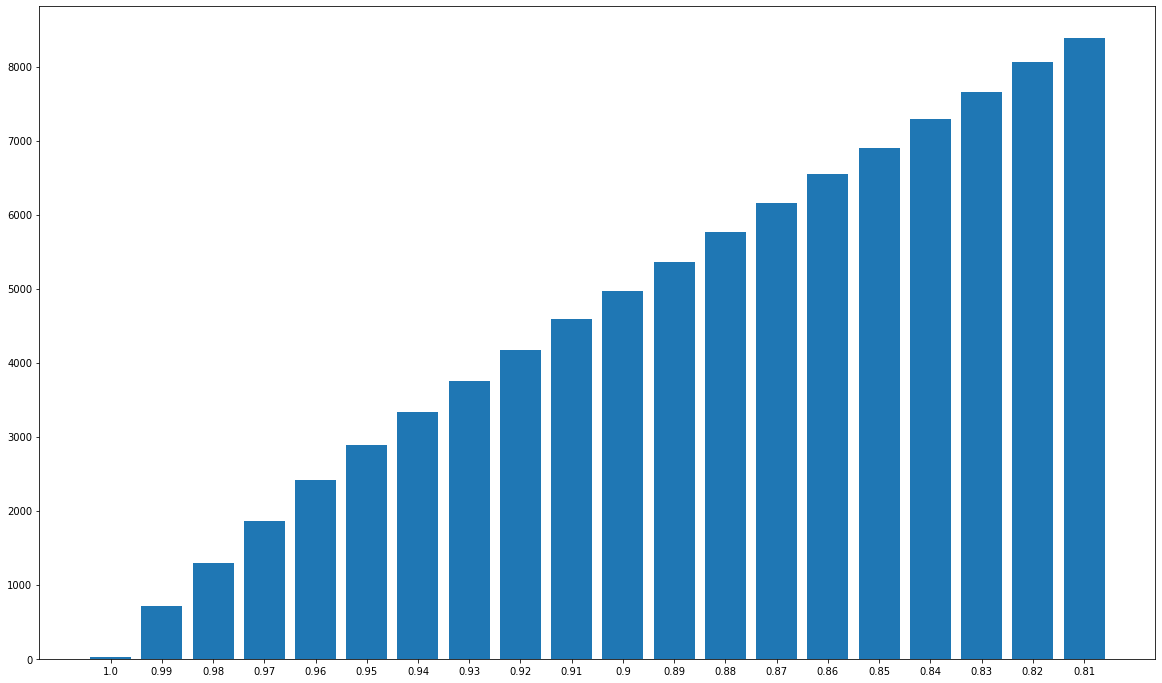

In [17]:
phase2_take1['contin_cull'] = ['sqft_lot15','price','sqft_lot','sqft_living15']

df_cull_report = cull_report(df2,phase2_take1['contin_cull'],.8,df1)

fig, ax = plt.subplots(figsize=(20,12)) 
ax.bar(df_cull_report.index,df_cull_report['rows_dropped'])

It seems like removing rows containing a value that exceeds the .97 quantile for any of the continuous columns is a good place for us to take out the more extreme outliers without losing too much of our data. Lets drop those rows. 

In [18]:
phase2_take1['contin_cull_thresh'] = .97

df2 = rm_outliers_threshold(df2,phase2_take1['contin_cull'],phase2_take1['contin_cull_thresh'])

loss_report(df1,df2)

Rows Dropped: 1865    Rows Left: 19555   Percentage Remaining: 91.29


Lets see if this improved out scatter plots.

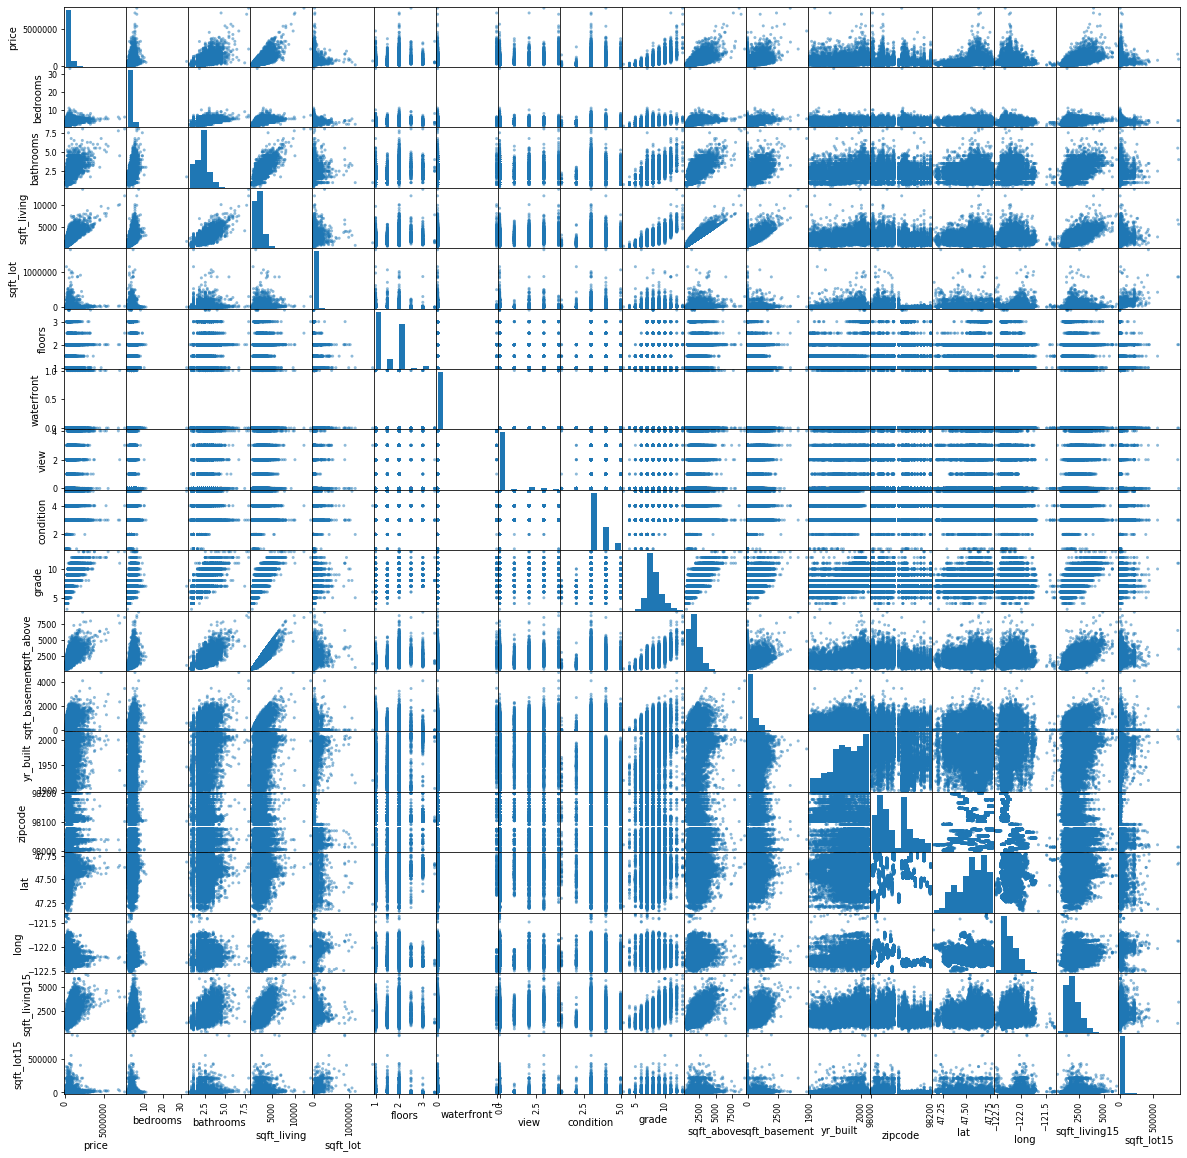

In [19]:
pd.plotting.scatter_matrix(df1,figsize=(20,20));

### Normalizing features. 
Lets pull histograms of our features to get a sense of their distributions. 

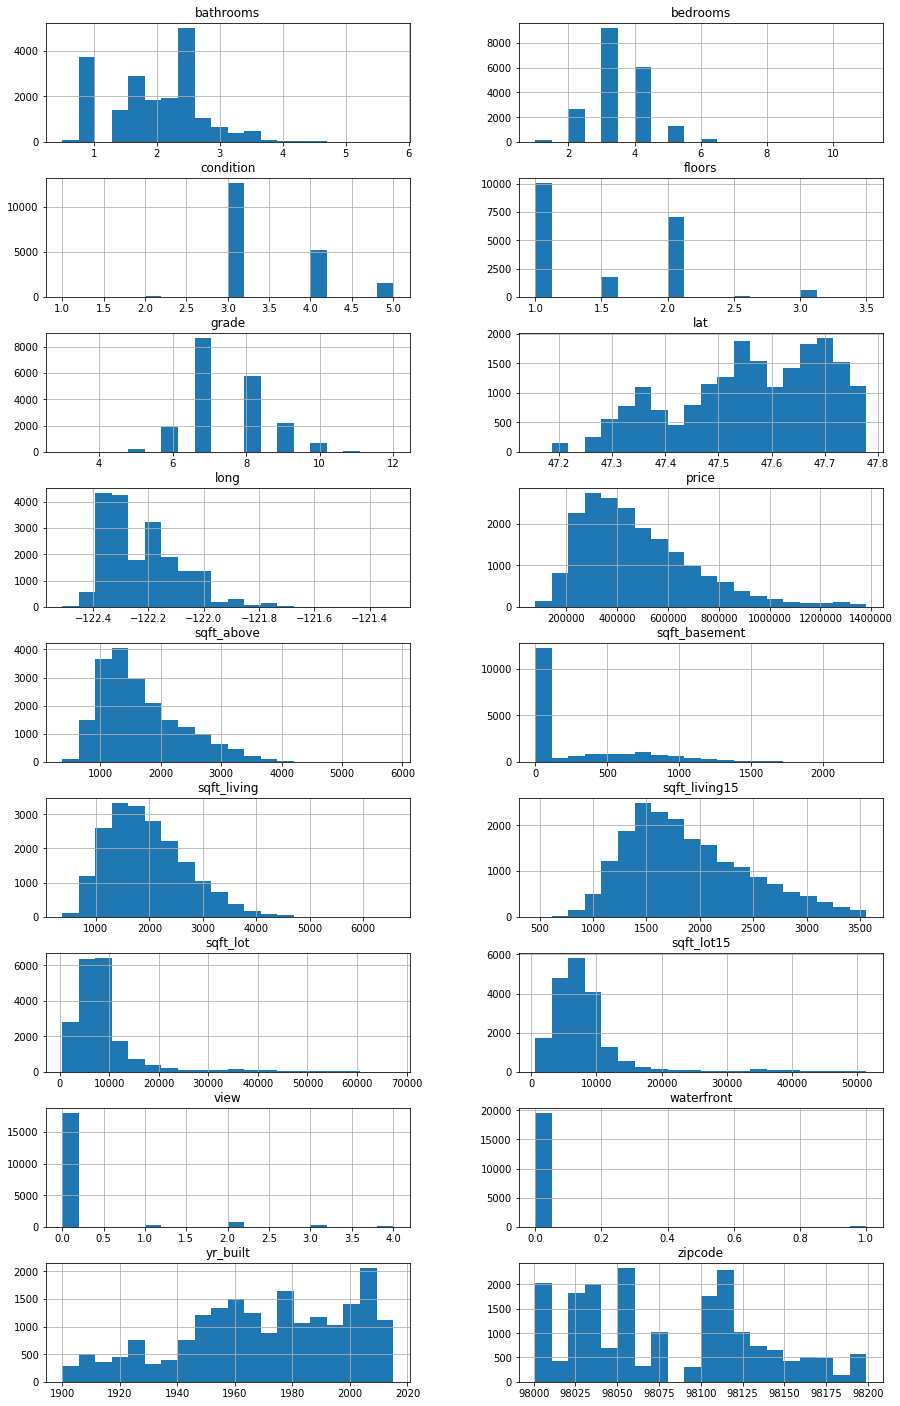

In [20]:
df2.hist(bins=20,layout=(9,2),figsize=(15,25));

From these histograms we can see that our continuos variables could benefit from normalization. However, I wonder if we should normalize 'price', given that it will be our target variable? Opinion is divided on whether normalizing or scaling the target is a good idea. Lets hold off for now, and perhaps we can revisit this question later.

In [21]:
phase2_take1['cols_normed'] = ['sqft_above','sqft_living15','sqft_lot','sqft_lot15','sqft_living']

Below is a function that will normalize specified columns in a dataframe using np.log. Lets use it to normalize the columns we want. 

In [22]:
def logarize (dataframe,columns):
    
    df = dataframe
    
    for col in columns:
        df[col] =df[col].map(lambda x: np.log(x))
    
    return df

df2 = logarize(df2,phase2_take1['cols_normed'])

Lets plot histograms again to make sure. 

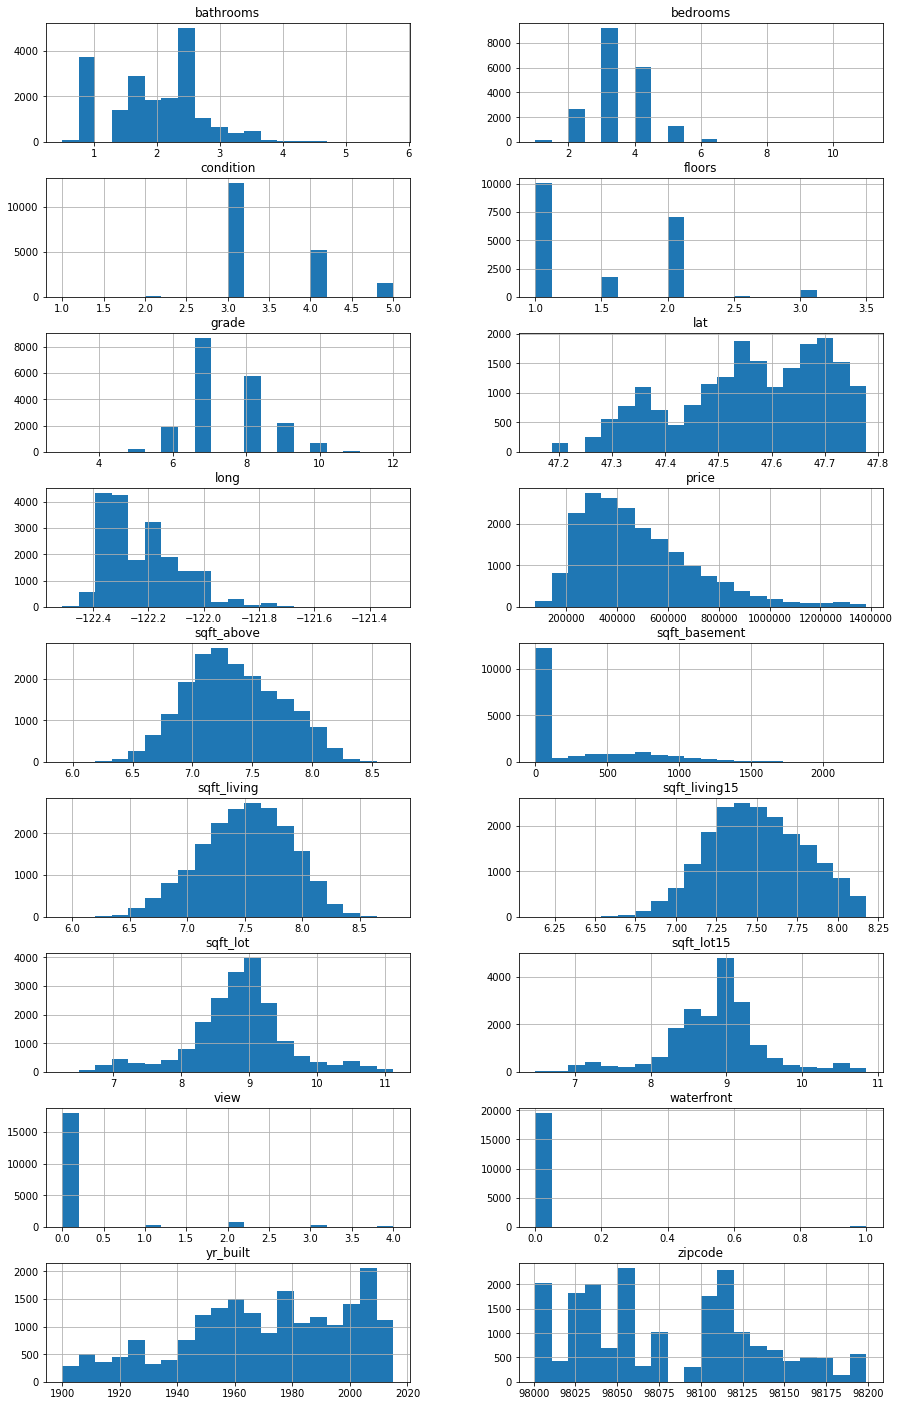

In [23]:
df2.hist(bins=20,layout=(9,2),figsize=(15,25));

Good! now Price and the Square footage features have much more normal distributions. 

### Colinearity

Lets check colinearity across all columns, to help us remove redundant features. 
A heatmap of correlation values will helpful to visually assess correlation among the features. 

The function below generates a clean, non-redundant heatmap of correlation values for the columns of our dataframe. 

(<Figure size 864x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f29cd2cc150>)

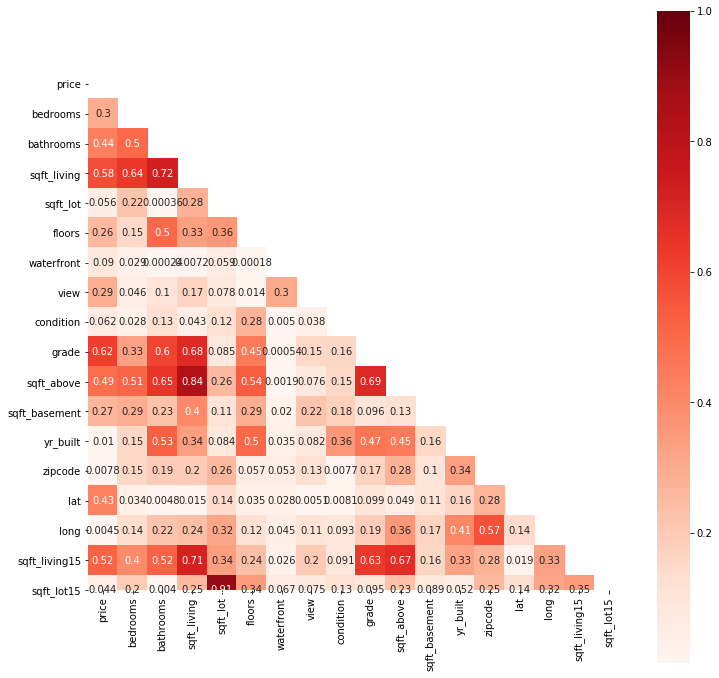

In [24]:
def colinearity_plot(corr,figsize=(12,12)):
    '''non-redundant heatmap of colinearity among columns of dataframe passed in'''
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True,mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax

colinearity_plot(np.abs(df2.corr()))

It looks like some features a strongly co-related, and hence good candidates for removal on account of the multi-colinearity they introduce into the model. 

The function below returns a series consisting of pairs of columns with a Pearson correlation co-efficient higher than 
the specified threshold. The column pairs are displayed as elements of a multilevel index.

We will use this function to return a list of feature pairs with a co-relation value higher than 0.75.

In [25]:
 def high_corr(dataframe,threshold):
    '''returns multi indexed series of feature pairs with correlation above specified threshold'''
    corr = dataframe.corr()
    sign_corr = corr[abs(corr) > threshold]
    sign_corr = sign_corr.stack()
    sign_corr.drop_duplicates(inplace=True)
    sign_corr = sign_corr[sign_corr != 1]
    
    
    return sign_corr

display(high_corr(df2,0.75))

sqft_living  sqft_above   0.84
sqft_lot     sqft_lot15   0.91
dtype: float64

#### Analysis

    Looks like sqft_above and sqft_lot15 have very high levels of corelation with other, more on point features. Lets remove them. 

In [26]:
phase2_take1['colinear_columns'] = ['sqft_above','sqft_lot15']

### Categorical Variables
We must evaluate our features to see if any of them can rightly be treated as categorical variables, and then undertake the appropriate transformations of our data. From the scatter plots we drew before it seems that Zipcode definitely seems like a good for the application of one hot encoding and so does Waterfront. But using one hot encoding zipcode will create a large number of new features, so lets hold off. However, the remaining variables that look categorical from the scatter plots seem...inherently numeric, granted they dont have a large range of values. The number of floors a house has is still a number. Condition and grade are attempts to quantify qualitative features, and as such have already been converted to numeric features for us. 

Im also going to make a copy of the df2 frame here, before applying one hot encoding to the dataframe, because I need a dateframe in this state for the next section on exploration

In [27]:
phase2_take1['categ_cols'] =  ['waterfront']

df_zipcode = df2.copy()

Now lets run one hot encoding on zipcode and then compile our final scaled dataframe. The function below returns a dataframe with the one-hot columns for the specified columns tacked on to the original dataframe.

In [28]:
def category_frame (dataframe,categ_cols):
    for col in categ_cols:
        
        cat_frame = pd.get_dummies(dataframe[col],drop_first=True)
        cat_frame = cat_frame.astype('int64')
        
        dataframe.drop(col,axis=1,inplace =True)        
        dataframe = dataframe.merge(cat_frame,left_index=True,right_index=True)        
        dataframe.fillna(0)
        
    return dataframe

df2 = category_frame(df2,phase2_take1['categ_cols'])

### Scaling


Its time to scale our features. I will use min-max, since I have already removed outliers. 

In [29]:
def min_max_col (series):
    scaled = (series - min(series)) / (max(series) - min(series))
    return scaled

def df_scaler (dataframe,col_list):
    for col in col_list:
        dataframe[col] = min_max_col(dataframe[col])
    return dataframe

df2 = df_scaler(df2,list(df2.columns))

### Consolidated Reprocessing Function
In case we want to revisit our dataset and pre-process it differently to make improvements to our model, lets define a master function with which we can easily reprocess out data. We will feed it a dictionary specifying which columns to scrub for outliers, the columns we want to normalize using np.log and which columns to convert to one hot encoded categories. It will return a processed dataframe. 

In [30]:
def pre_process (dataframe,dictionary):
    
    
    dict = dictionary
    
    
    dataframe = rm_outliers_dict(dataframe,dict['categ_culled'])
    
    dataframe = rm_outliers_threshold(dataframe,dict['contin_cull'],dict['contin_cull_thresh'])
    
    dataframe = logarize(dataframe,dict['cols_normed'])
    
    dataframe = category_frame(dataframe,dict['categ_cols'])
    
    
    
    dataframe = dataframe.drop(dict['colinear_columns'],axis=1)    
      
    dataframe = dataframe.drop(dict['remove_cols'],axis=1)
    
    
   
    dataframe = df_scaler(dataframe,list(dataframe.columns))
    
    dataframe = dataframe.fillna(0)
    
    
    print(loss_report(df1,dataframe)) 
    
        
    return dataframe
    
    

Up untill now, we have been doing our preliminary scrubbing step by step and modified df2 as we went. We did this in order to evaluate the effects of our modifications on the data. For the sake of consistency, let's recreat the df2 using the master reprocessing function. This will also serve as a template for future reprocessing

In [31]:
phase2_take1 = {}

phase2_take1['categ_culled']       =  {'bedrooms':15,'bathrooms':6}

phase2_take1['contin_cull']        =  ['sqft_lot15','price','sqft_lot','sqft_living15']

phase2_take1['contin_cull_thresh'] =  .97

phase2_take1['cols_normed']        =  ['sqft_above','sqft_living15','sqft_lot','sqft_lot15','sqft_living']

phase2_take1['colinear_columns']   =  ['sqft_above','sqft_lot15']

phase2_take1['categ_cols']         =  []

phase2_take1['remove_cols']        =  []                   


In [32]:
df2 = df1.copy()

df2 = pre_process(df2,phase2_take1)

Rows Dropped: 1865    Rows Left: 19555   Percentage Remaining: 91.29
None


# EXPLORE

## QUESTION 1: How does home price and value vary geographically?
I would like to explore the variations in data across zipcodes in depth. It would be nice to have a geographic sense of house values, would'nt it? Lets import the GeoPands library to generate some map based visualizations to see how the different metrics in our dataset vary across geographic regions.


In [33]:
import geopandas as gpd

df_zipcode = df_zipcode.groupby('zipcode').median()
df_zipcode.reset_index(level=0, inplace=True)

king_count = gpd.read_file('king_county_shapefile/Zipcodes_for_King_County_and_Surrounding_Area_Shorelines__zipcode_shore_area.shp')

king_count.drop(['OBJECTID','ZIP','ZIP_TYPE'],axis=1,inplace=True) 
king_count['ZIPCODE'] = pd.to_numeric(king_count['ZIPCODE'])
king_count = king_count.merge(df_zipcode,left_on='ZIPCODE',right_on='zipcode',how='inner')

king_count['coords']= king_count['geometry'].apply(lambda x : x.representative_point().coords[:])
king_count['coords']= [coords[0] for coords in king_count['coords']]

#dropping the western most zipcodes. Theyre sparsley populated, not very itneresting and is skewing out maps below
king_count = king_count[king_count['long'] < -122.00]
#king_count = king_count[king_count['zipcode'] != 98022]

### Price 
Lets start by looking at what zipcodes have the highest median sale price 

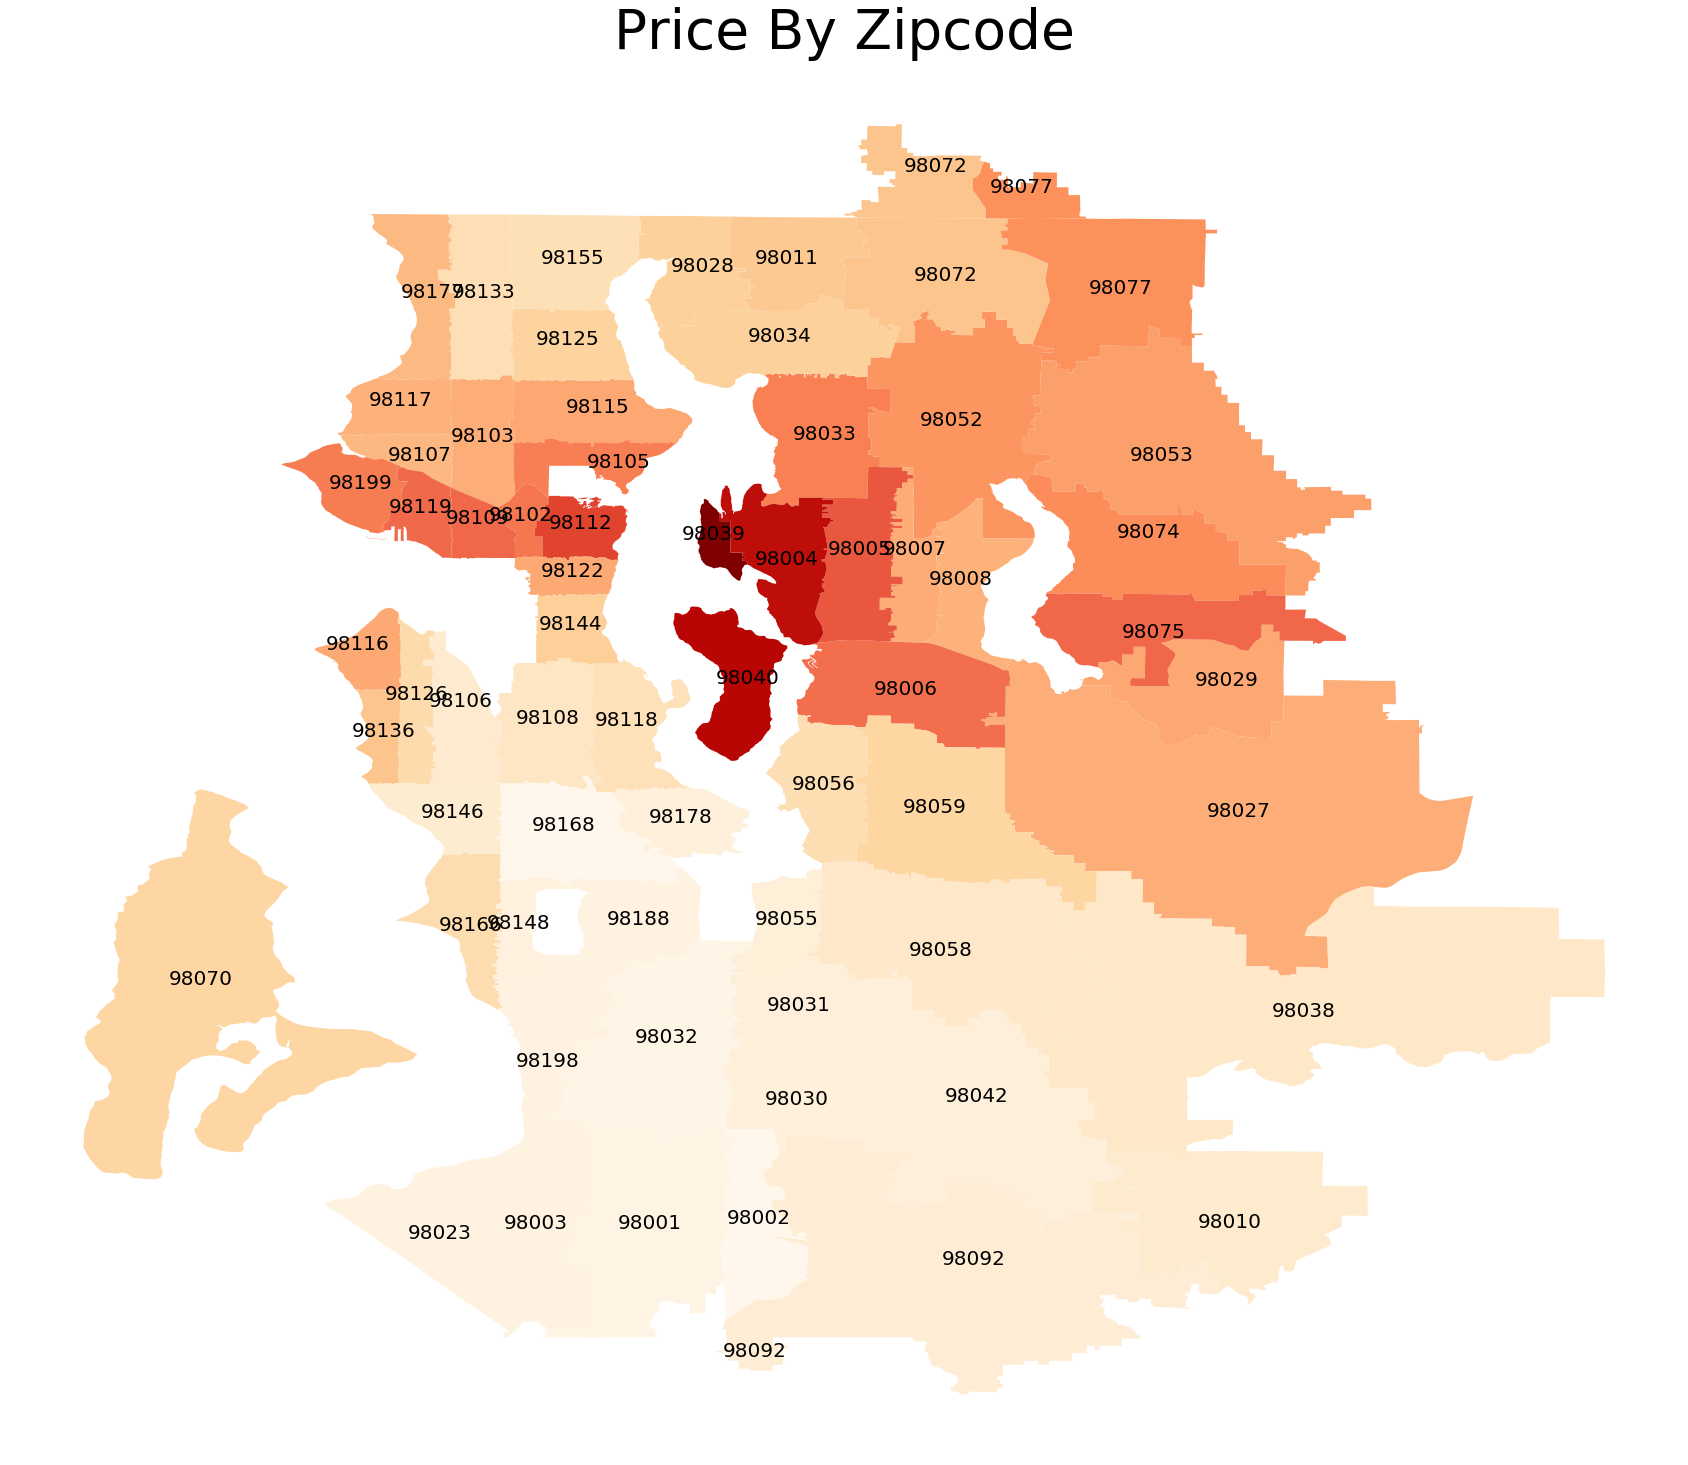

In [34]:
mpl.rcParams['figure.figsize'] = (30,30)

title_dict = {'fontsize': 55,
 'fontweight' : 15}

king_count.plot(column='price',cmap='OrRd',legend=False)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],
                 horizontalalignment='center',size=20)

plt.axis('off')
plt.title('Price By Zipcode',fontdict=title_dict)

plt.savefig('plot_images/price_map')

As one would expect, the price of houses seems to get higher closer to the city center and drop as we head out. 
98040 and 98039 seem to have the most expensive properties! I wonder why that is?


### Price per square foot

Let's engineer a new feature called "Price/Sqft" which will reflect the price per square foot. My hypothesis is that this metric will vary in tandem with geographic location. 

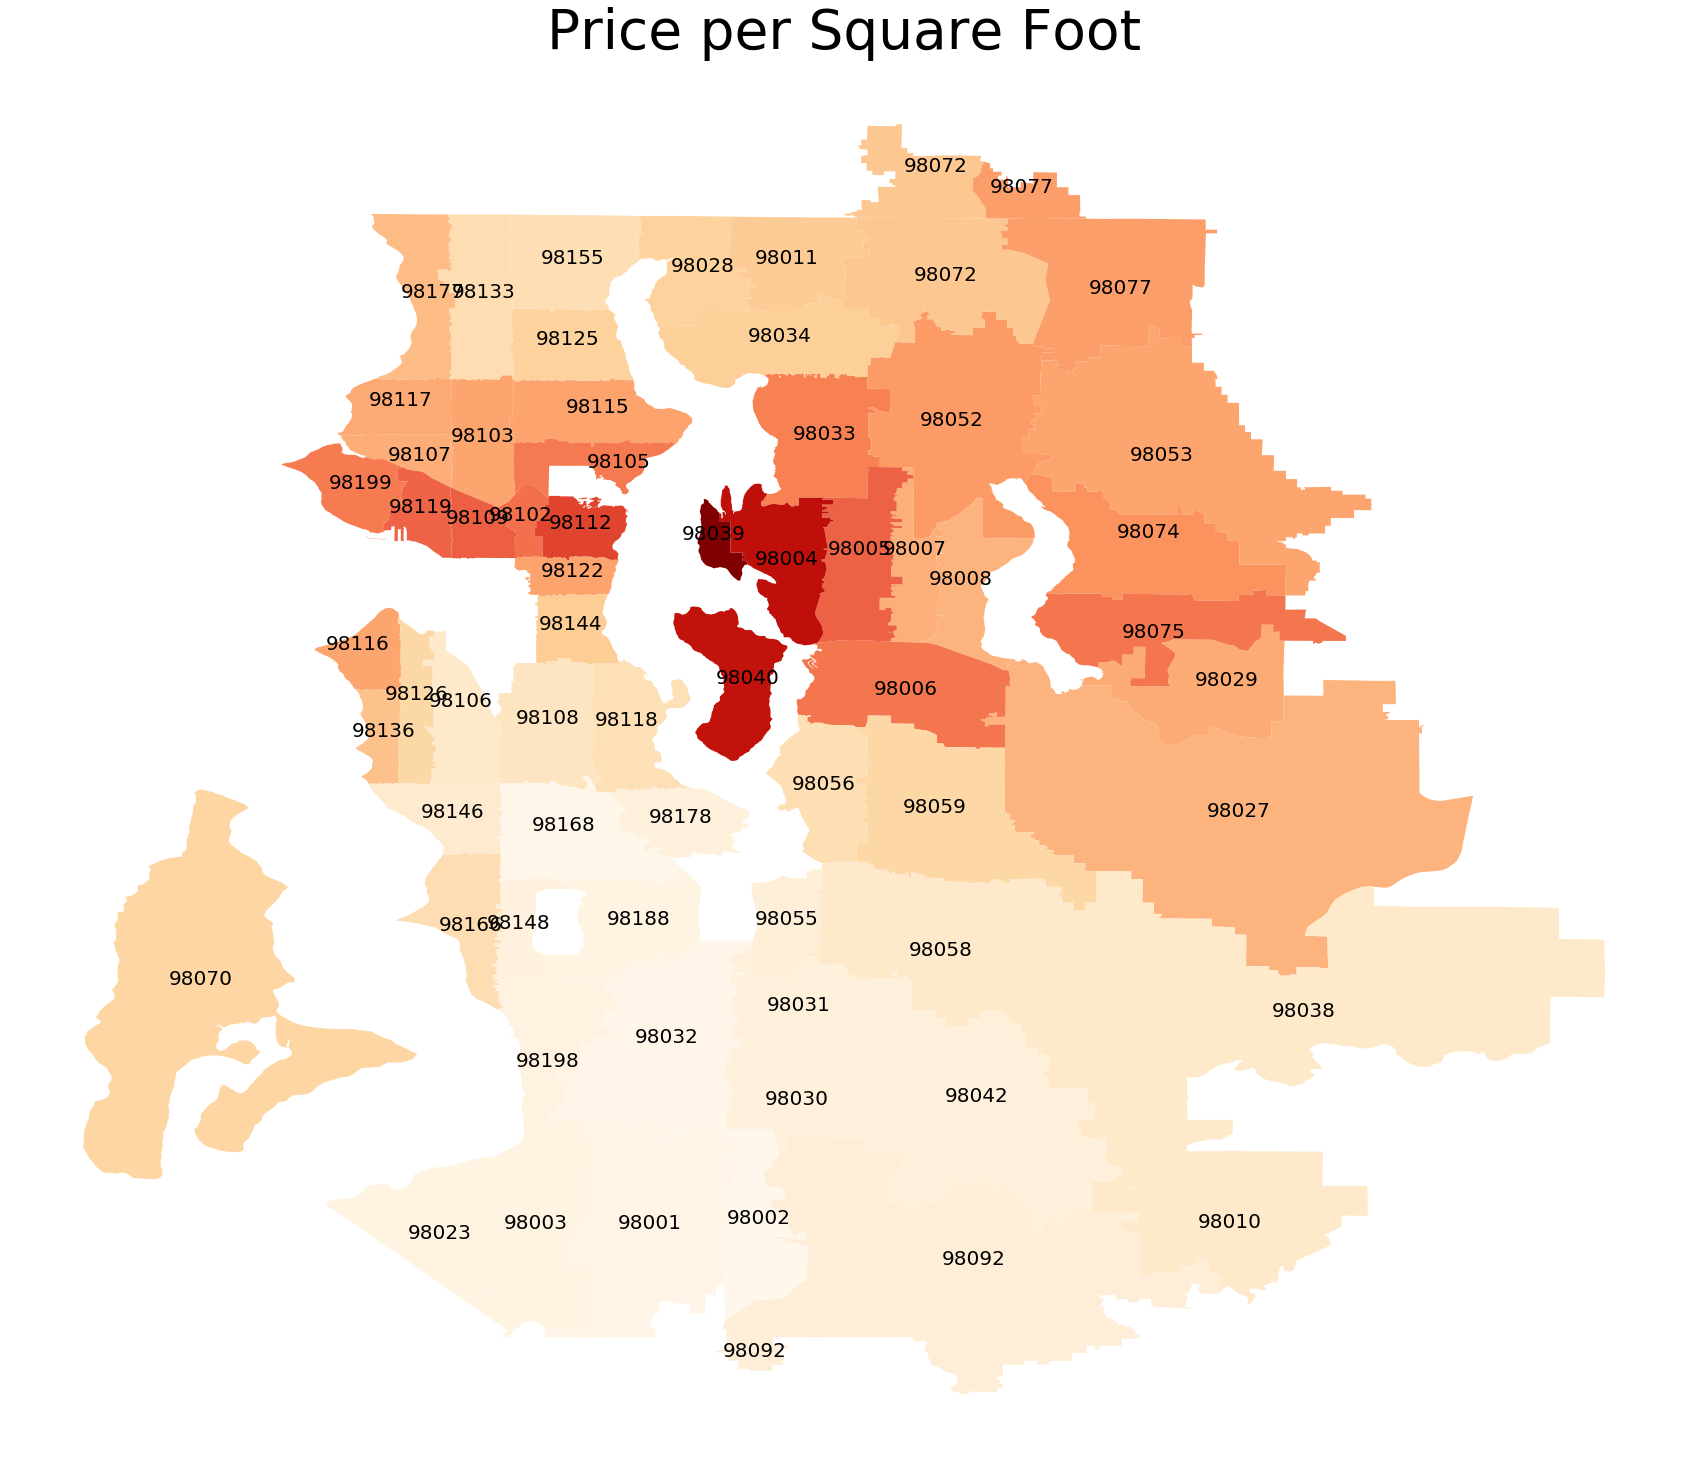

In [35]:
king_count['price/sqft'] = king_count['price']/king_count['sqft_living']

king_count.plot(column='price/sqft',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Price per Square Foot',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/price_sqft_map')

This is a more stable metric and aligns closely with the proposition that living space is more valuable closer to the city center. 

## QUESTION 2: How are living space and lot size related, and how do they vary geographically?

### Indoor Square Footage

Now lets see how indoor square footage varies across the region. I suspect, it will vary in the opposite way as price, which is to say that indoor square footage per house will be smaller towards the city center and larger as we go out. 

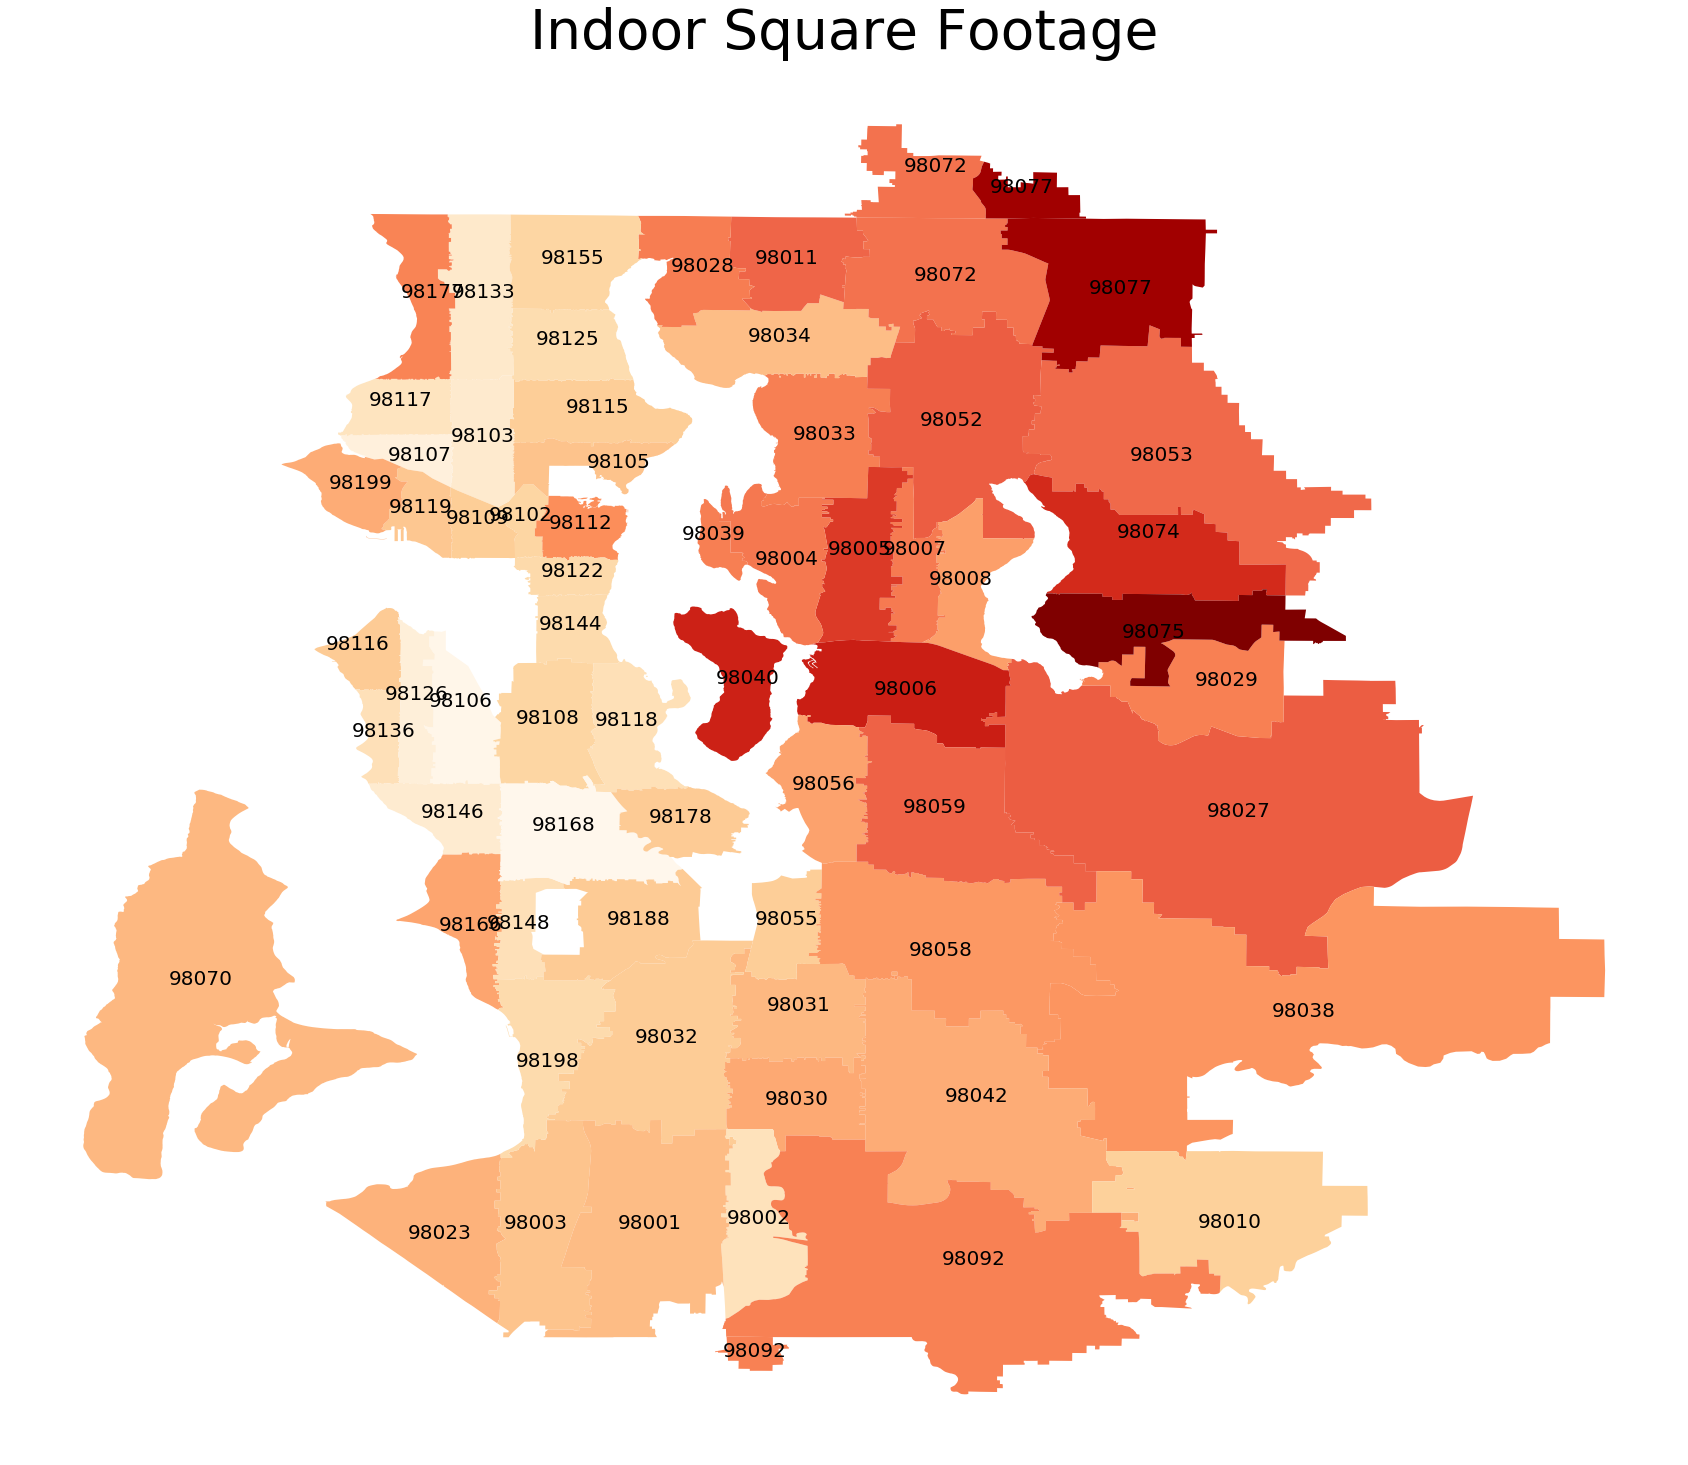

In [36]:
king_count.plot(column='sqft_living',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Indoor Square Footage',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/sqft_above_map')

Sure enough, our hypothesis checks out. Oh my 98075 looks like it has some huge mansions!It also seemed like the median price here was high too, relative to its neighbors.
This must be a fancy neighborhood! 

### Lot size
Now lets see see how lot sizes change. I Imagine similarly to indooor square footage. 

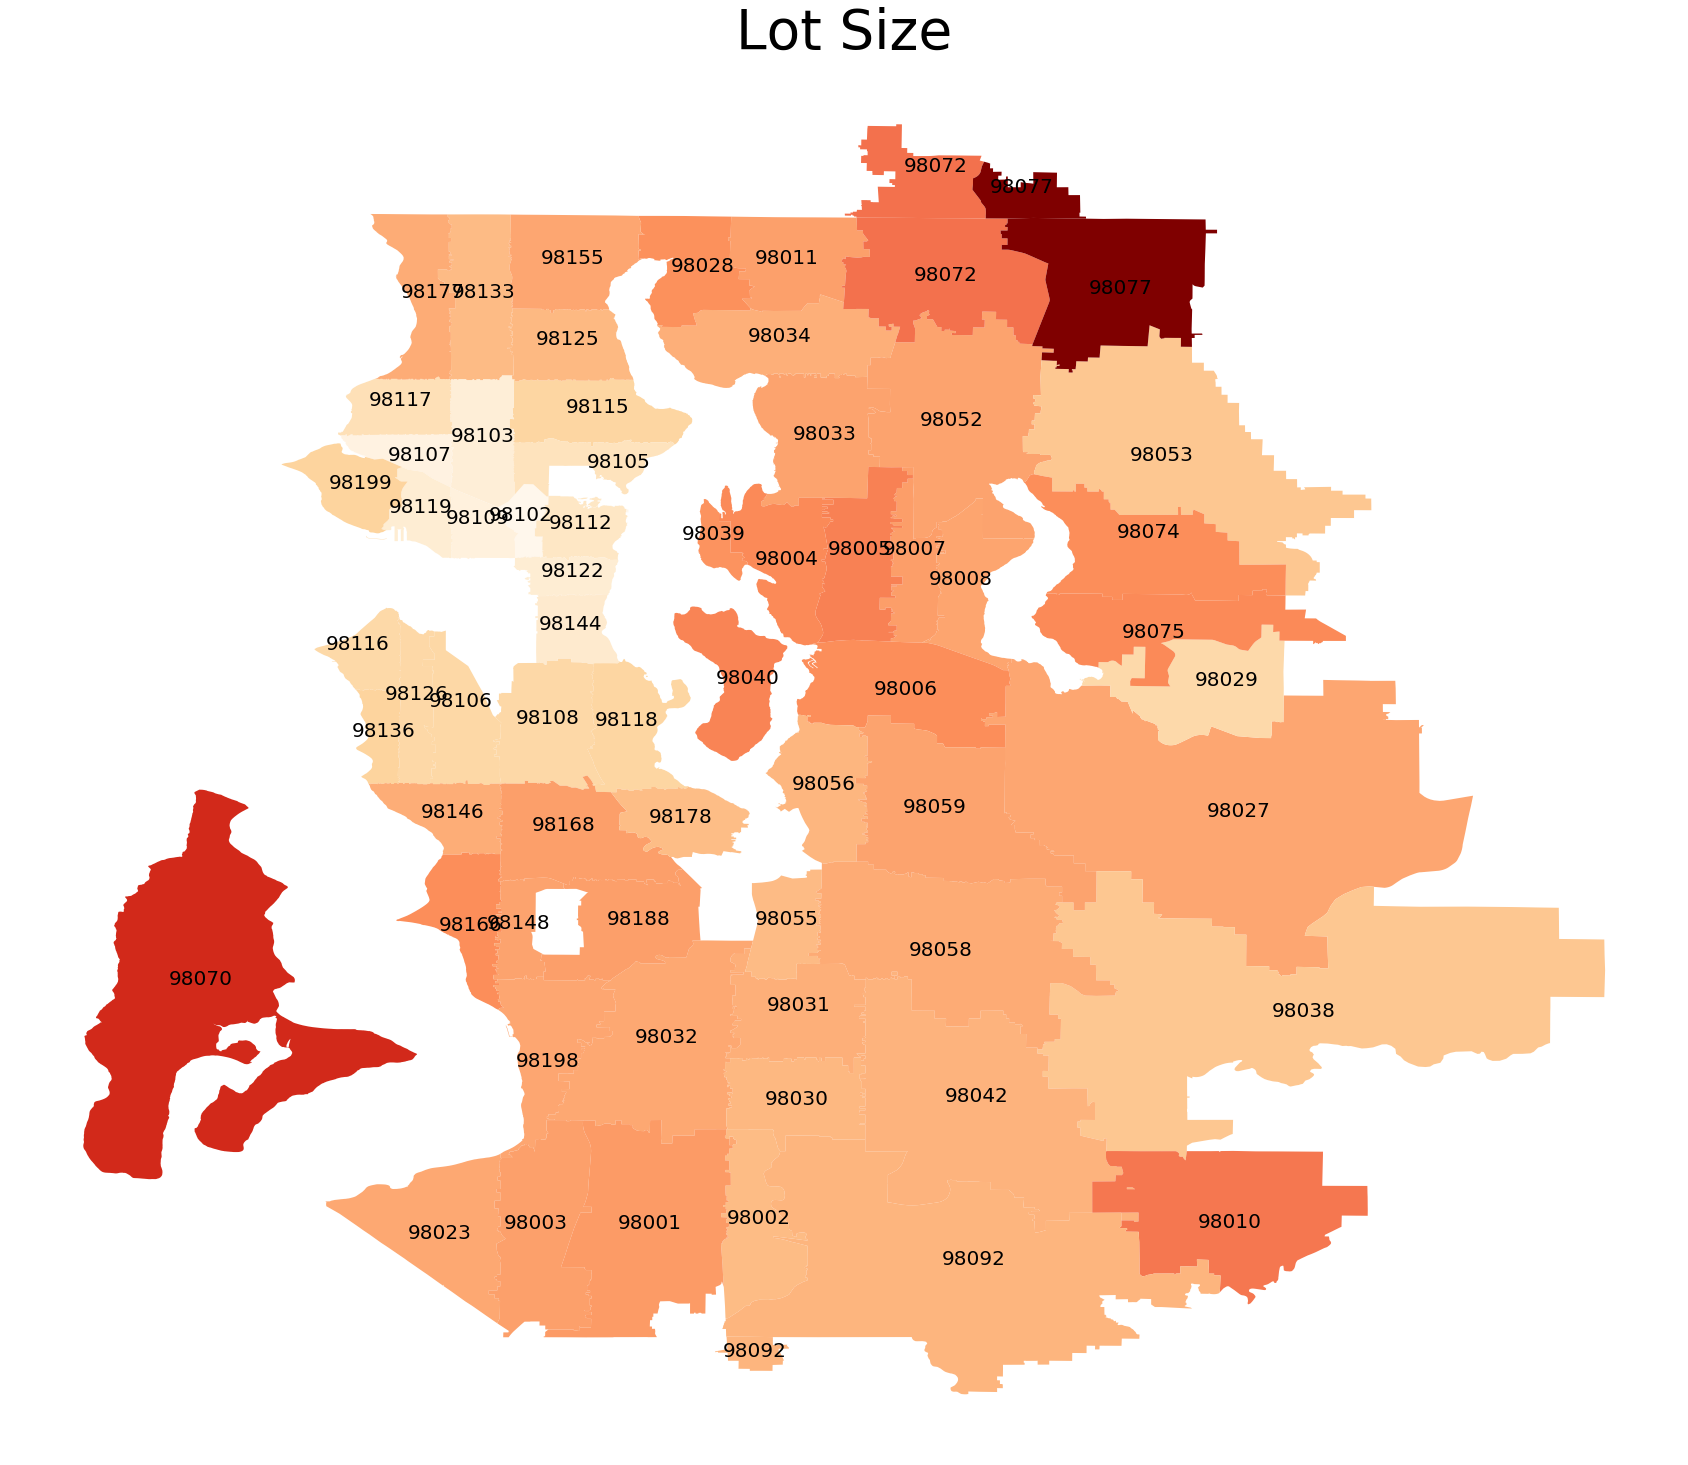

In [37]:
king_count.plot(column='sqft_lot',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Lot Size',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/lot_size_chart')

### Lot size to Living Space ratio

Looks like 98075's neighbors to the north, 98074, have bigger yards but smaller houses. 
Lets engineer a new features called "indoor/lot". This will be ratio of the indoor square footage to the lot size. 
Basically, how much indoor space per unit of lot size. Lets make a new map for this feature. Might be a better way to get an estimate of living space density.

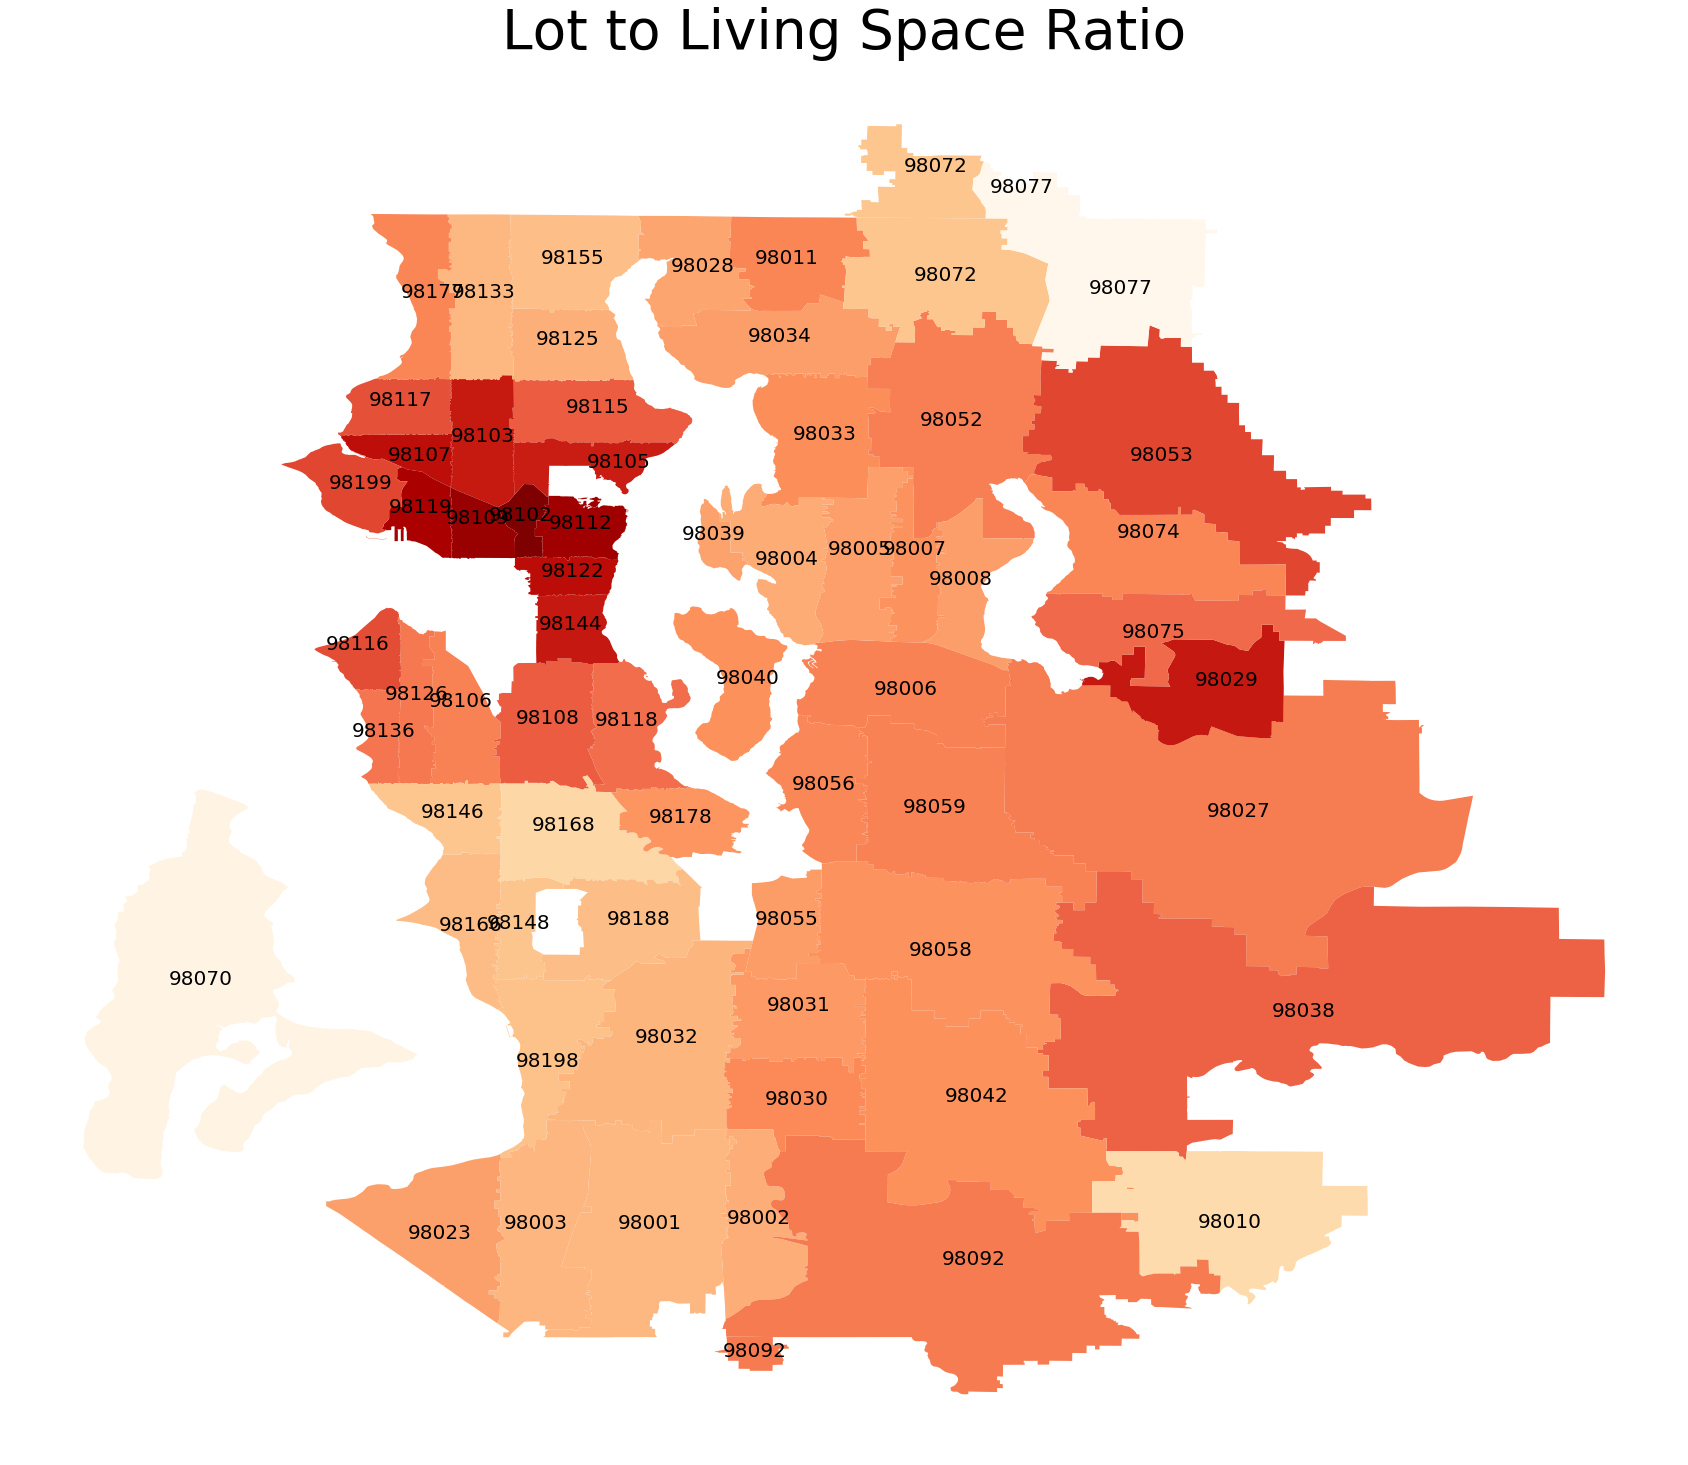

In [38]:
king_count['indoor/lot'] = king_count['sqft_living']/king_count['sqft_lot']

king_count.plot(column='indoor/lot',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Lot to Living Space Ratio',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/lot_vs_indoor_map')

Fascinating. As well see, there is more living space on each lot closer to the city center. This is probably due to the fact there are more apartment buildings closer to the city, so the living space per unit area is denser which is in line with what we expect from major cities. 

It also confirms that 98074 people do have larger yards, while 98075 folks have larger houses. 


# MODEL

Our aim for the proejct is to build a model that can predict the price of a home based on other data about that home, with relative accuracy. To achieve this goal we will use multiple linear regression methods implemented using statsmodels. 

Our overall methodology will be as follows

1. We will pull in different version of our primary dataset, modified in different ways for each trial. 
2. We will fit a preliminary model to this data set. 
3. We will assess the p-values assigned to the co-efficients of our preliminary model, filter them out, and re-train our model
4. We will validate the model using train-test-split over a number of iterations to ensure the integrity of our results. 

To filter out features with high p-values, we will use the following functions:

In [39]:
def remove_pvals (model,dataframe):
    ''' Removes columns representing features with high p-values'''
    pvalues = round(model.pvalues,4)
    pvalues = pvalues.drop('const')
    high_pvalues = pvalues[pvalues > 0.05]    
    high_list = list(high_pvalues.index)

    dataframe = dataframe.drop(high_list,axis=1)
    
    return dataframe 

For our first trial, we will use a custom function to identify what constitutes a good sample size. For the remaining trials, we will assume that it is still the best sample size to use to split the data into training and test sets. 

The following function will split our dataset into chunks ranging from 5% of the dataset to 95% of the dataset, in increments of 5%. For each test, we will generate a hundered random splits of the data into training and test sets of the given test size. We will fit our model, use it to predict values on the test set and the gather the mean squared error for each iteration in the 25 random samples. We will take the average mean squared error from 25 samples at each test size and add them to a results data frame. In this way, we will be able to analyze the spread in the mean squared error between the training set and the test set, for different sizes of test sets. 

In [40]:
from sklearn.model_selection import train_test_split
mpl.rcParams['figure.figsize'] = (20,10)

def test_size_validation (predictors,target):
    collection = []
    size = []
    x= 0.05
    
    while x < 0.95:
        
        errorlist = []
        
        for j in range(1,50):
            
            x_train,x_test,y_train,y_test= train_test_split(predictors,target,test_size=x)
            
            x_train_int= sm.add_constant(x_train)
            
            x_test_int= sm.add_constant(x_test)
            
            olsmod = sm.OLS(y_train,x_train_int).fit()
                       
            y_train_hat = olsmod.predict(x_train_int)
            
            y_test_hat = olsmod.predict(x_test_int)
            
            train_mse = np.sum((y_train - y_train_hat)**2/len(y_train))

            test_mse = np.sum((y_test - y_test_hat)**2/len(y_test))
            
            errorlist.append([train_mse,test_mse])


        saveframe = pd.DataFrame(errorlist,columns=['train','test'])   
        collection.append([str(x), round(saveframe['train'].mean(),3),round(saveframe['test'].mean(),3),0])   

        x = round((x + 0.05),2)

    coll_frame = pd.DataFrame(collection,columns=['size','train','test','delta%'])
    coll_frame['delta%'] = ((coll_frame['test'] - coll_frame['train'])/coll_frame['train']) * 100
    coll_frame['delta%'] = round(coll_frame['delta%'],2)
    coll_frame.set_index('size',inplace=True)    
    
    return coll_frame


The function below will chart the results of our test size validation function. 

In [41]:
def chart_train_test (predictors,target):
    coll_frame = test_size_validation(predictors, target)

    fig, ax = plt.subplots(2,1)

    coll_frame.sort_index(ascending=True,inplace=True)

    ax[0].scatter(coll_frame.index.values,coll_frame['train'],c='red')
    ax[0].scatter(coll_frame.index.values,coll_frame['test'],c='blue')

    coll_frame.sort_values('delta%',ascending=True,inplace=True)
    ax[1].bar(coll_frame.index.values,coll_frame['delta%'])



The following function will generate 25 different training and testing sets of the specified size, train and fit a model one each, gather up the results and average them out. This will ensure that our results are not affected too much by randomness. 

We will collect the mean r2 and  RMSE for both the training and the test set. We will also calculate a statistic known as the Mean Absolute Percentage of Error. This statistics looks at the average difference between the actual value and the predicted value for the target variable, and expresses it as a percentage of the actual value. This will allow us to compare model performance even if the target variable is on a different scale, and is generally a more helpful and easy to digest statistics for audiences than R2, which is often misunderstood. 

In [42]:
df2_0 = df2[df2['price'] == 0]
display(df2_0)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                    
40000362   0.00      0.10       0.10         0.26      0.71    0.00   

          waterfront  view  condition  grade  sqft_basement  yr_built  \
id                                                                      
40000362        0.00  0.00       0.00   0.22           0.00      0.37   

          zipcode  lat  long  sqft_living15  
id                                           
40000362     0.84 0.51  0.19           0.64

In [43]:
from math import sqrt
def mse_validation (predictors,target,size):
    collection = []
              
    errorlist = []
    
    for j in range(1,25):

        x_train,x_test,y_train,y_test= train_test_split(predictors,target,test_size=size)

        x_train_int= sm.add_constant(x_train)

        x_test_int= sm.add_constant(x_test)

        olsmod = sm.OLS(y_train,x_train_int).fit()

        y_train_hat = olsmod.predict(x_train_int)

        y_test_hat = olsmod.predict(x_test_int)

        train_mse = np.sum((y_train - y_train_hat)**2/len(y_train))

        test_mse = np.sum((y_test - y_test_hat)**2/len(y_test))
        
        train_r2 = olsmod.rsquared
        
        train_rmse = sqrt(train_mse)
        
        test_rmse = sqrt(test_mse)
        
        dfx = pd.concat([y_train,y_train_hat],axis =1)
        dfx = dfx[dfx['price'] != 0]
        dfx['diff'] = abs(dfx['price'] - dfx[0])
        dfx = dfx[dfx['diff'] != 0]
        dfx['perc'] = (dfx['diff']/dfx['price'])*100
        train_mape = dfx['perc'].mean()
        
        dfxhat = pd.concat([y_test,y_test_hat],axis =1)
        dfxhat = dfxhat[dfxhat['price'] != 0]
        dfxhat['diff'] = abs(dfxhat['price'] - dfxhat[0])
        dfxhat = dfxhat[dfxhat['diff'] != 0]
        dfxhat['perc'] = (dfxhat['diff']/dfxhat['price'])*100
        test_mape = dfxhat['perc'].mean()
        
        
        errorlist.append([train_mse,test_mse,train_r2,train_rmse,test_rmse,train_mape,test_mape])

    saveframe = pd.DataFrame(errorlist,columns=['train','test','r2','train_rmse','test_rmse','train_mape','test_mape'])
    
    saveframe.fillna(0.0)
    
    report_dict = {}
    
    report_dict['train_mean_squared_error'] = saveframe['train'].mean()
    report_dict['test_mean_squared_error'] = saveframe['test'].mean()
    report_dict['train_rmse'] = saveframe['train_rmse'].mean()
    report_dict['test_rmse'] = saveframe['test_rmse'].mean()  
    report_dict['train_mape'] = saveframe['train_mape'].mean()
    report_dict['test_mape'] = saveframe['test_mape'].mean()
    report_dict['mean_r2'] = round(saveframe['r2'].mean(),2)
    
    
    report_frame = pd.DataFrame.from_dict(report_dict,orient='index',columns=['Scores'])  
    
    return report_frame

Now lets write a master pipeline function into which we can feed a dataframe, a processing dictionary and the name of the target feature, and have it return a model and a validation report. 

In [44]:
def multi_reg_model(dataframe,dictionary,target,rem_pvals = False, test_size = 0.2):
    
    df = pre_process(dataframe,dictionary)
    df = df[df[target] != 0]   
    
    target_series = df[target]
    predictors = df.drop(target,axis=1)
    pred_int = sm.add_constant(predictors)
    
    model = sm.OLS(target_series,pred_int).fit()
    
    if rem_pvals == True:
        df = remove_pvals (model,df)
        
        target_series = df[target]
        predictors = df.drop(target,axis=1)
        
        pred_int = sm.add_constant(predictors)
        model = sm.OLS(target_series,pred_int).fit()
        
    report = mse_validation (predictors,target_series,test_size)
    
    display(model.summary())
    display(report)
    
    return df,model,report

## First Trial
Lets fit our first model. We will use df2, the current version of our processed dataframe, as the base dataset we will use to train our model. 

### Preliminary Model

In [45]:
df2_1 = df2.copy()

target = df2_1['price']
predictors = df2_1.drop('price',axis=1)

pred_int = sm.add_constant(predictors)
model = sm.OLS(target,pred_int).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2787.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:41:23   Log-Likelihood:                 17669.
No. Observations:               19555   AIC:                        -3.531e+04
Df Residuals:                   19539   BIC:                        -3.518e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3342      0.007    -50.784      0.000      -0.347      -0.321
bedrooms         -0.0761      0.011     -7.123      0.000      -0.097      -0.055
bathrooms         0.1165      0.009     12.781      0.000       0.099       0.134
sqft_living       0.3151      0.012     25.601      0.000       0.291       0.339
sqft_lot         -0.0850      0.007    -12.943      0.000      -0.098      -0.072
floors            0.0456      0.005      8.735      0.000       0.035       0.056
waterfront        0.1628      0.013     12.061      0.000       0.136       0.189
view              0.1302      0.005     27.065      0.000       0.121       0.140
condition         0.0773      0.005     16.275      0.000       0.068       0.087
grade             0.6241      0.010     61.373      0.000       0.604       0.644
sqft_basement     0.0037      0.006      0.654      0.513      -0.007       0.015
yr_built         -0.2036      0.004    -49.589      0.000      -0.212      -0.196
zipcode          -0.0423      0.003    -12.672      0.000      -0.049      -0.036
lat               0.2617      0.003     76.569      0.000       0.255       0.268
long             -0.0237      0.008     -2.835      0.005      -0.040      -0.007
sqft_living15     0.1501      0.008     19.545      0.000       0.135       0.165
==============================================================================
Omnibus:                     3384.722   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9039.574
Skew:                           0.943   Prob(JB):                         0.00
Kurtosis:                       5.745   Cond. No.                         41.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hmm. R2 of 0.68. Lets try to improve. 

### Filter out High p-Values

In [46]:
df2_1 = remove_pvals(model,df2_1)

target = df2_1['price']
predictors = df2_1.drop('price',axis=1)

pred_int = sm.add_constant(predictors)
model = sm.OLS(target,pred_int).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2986.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:41:23   Log-Likelihood:                 17669.
No. Observations:               19555   AIC:                        -3.531e+04
Df Residuals:                   19540   BIC:                        -3.519e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3344      0.007    -50.914      0.000      -0.347      -0.322
bedrooms         -0.0762      0.011     -7.138      0.000      -0.097      -0.055
bathrooms         0.1174      0.009     13.015      0.000       0.100       0.135
sqft_living       0.3187      0.011     28.836      0.000       0.297       0.340
sqft_lot         -0.0859      0.006    -13.402      0.000      -0.099      -0.073
floors            0.0439      0.005      9.693      0.000       0.035       0.053
waterfront        0.1627      0.013     12.053      0.000       0.136       0.189
view              0.1306      0.005     27.444      0.000       0.121       0.140
condition         0.0775      0.005     16.348      0.000       0.068       0.087
grade             0.6233      0.010     61.744      0.000       0.604       0.643
yr_built         -0.2037      0.004    -49.633      0.000      -0.212      -0.196
zipcode          -0.0422      0.003    -12.659      0.000      -0.049      -0.036
lat               0.2619      0.003     76.992      0.000       0.255       0.269
long             -0.0244      0.008     -2.947      0.003      -0.041      -0.008
sqft_living15     0.1496      0.008     19.583      0.000       0.135       0.165
==============================================================================
Omnibus:                     3385.709   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9038.010
Skew:                           0.943   Prob(JB):                         0.00
Kurtosis:                       5.745   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Not a dramatic improvement. Lets keep going

### Test Size Validation 
Lets see what a good size is for our test sets. 

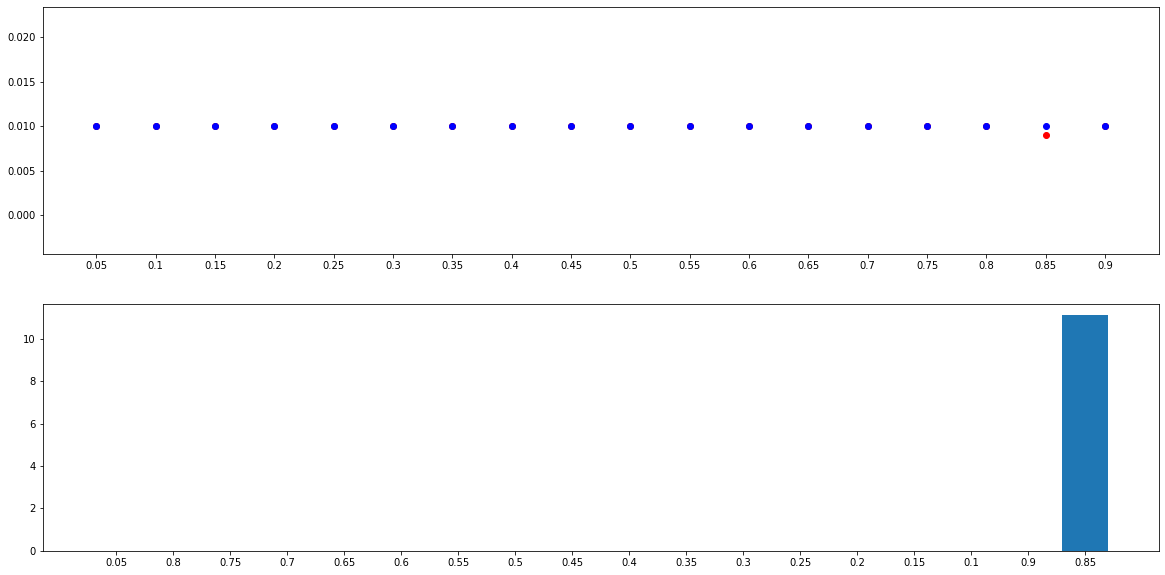

In [47]:
chart_train_test (predictors,target)

It seems like a test data set size of 20% is a good size for splitting our dataset. 

### Validation 
Now lets use our validation function to make sure that the results of our model hold up across different random iterations of train-test-split

In [48]:
display(mse_validation(predictors,target,0.2))

Scores
train_mean_squared_error    0.01
test_mean_squared_error     0.01
train_rmse                  0.10
test_rmse                   0.10
train_mape                 30.09
test_mape                  29.99
mean_r2                     0.68

Looks like our r2 holds up. RMSE is kind of high though. Predicted values are up to 30% higher or lower than actual values. Thats a wide margine. 

## Second Trial - Normalize Price
Let's see if we cant improve the performance of our model a little bit. To do so, let's revisit our data and normalize price to see what happens. 

In [49]:
phase2_take2 = {}

phase2_take2['categ_culled']       =  {'bedrooms':15,'bathrooms':6}

phase2_take2['contin_cull']        =  ['sqft_lot15','price','sqft_lot','sqft_living15']

phase2_take2['contin_cull_thresh'] =  .97

phase2_take2['cols_normed']        =  ['price','sqft_above','sqft_living15','sqft_lot','sqft_lot15','sqft_living']

phase2_take2['colinear_columns']   =  ['sqft_above','sqft_lot15']

phase2_take2['categ_cols']         =  ['waterfront']

phase2_take2['remove_cols']        =  []              

In [50]:
df2_2 = df1.copy()

df2_2,model2,report2 = multi_reg_model(df2_2,phase2_take2,'price',rem_pvals= True)

Rows Dropped: 1865    Rows Left: 19555   Percentage Remaining: 91.29
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     4117.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:42:40   Log-Likelihood:                 20997.
No. Observations:               19554   AIC:                        -4.197e+04
Df Residuals:                   19540   BIC:                        -4.186e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0429      0.005     -7.840      0.000      -0.054      -0.032
bedrooms         -0.0748      0.009     -8.316      0.000      -0.092      -0.057
bathrooms         0.0974      0.008     12.805      0.000       0.082       0.112
sqft_living       0.3439      0.009     36.894      0.000       0.326       0.362
sqft_lot         -0.1152      0.005    -22.017      0.000      -0.125      -0.105
floors            0.0354      0.004      9.307      0.000       0.028       0.043
view              0.0894      0.004     22.317      0.000       0.082       0.097
condition         0.0795      0.004     19.870      0.000       0.072       0.087
grade             0.4910      0.008     57.994      0.000       0.474       0.508
yr_built         -0.1580      0.003    -47.156      0.000      -0.165      -0.151
zipcode          -0.0353      0.003    -13.815      0.000      -0.040      -0.030
lat               0.2986      0.003    104.330      0.000       0.293       0.304
sqft_living15     0.1666      0.006     26.009      0.000       0.154       0.179
1.0               0.1372      0.011     12.057      0.000       0.115       0.160
==============================================================================
Omnibus:                      311.502   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.336
Skew:                          -0.032   Prob(JB):                    1.78e-133
Kurtosis:                       3.864   Cond. No.                         38.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Scores
train_mean_squared_error    0.01
test_mean_squared_error     0.01
train_rmse                  0.08
test_rmse                   0.08
train_mape                 13.01
test_mape                  13.07
mean_r2                     0.73

That made quite the difference! r2 is up to 0.73 and the MAPE went down by more than half. 

## Third Trial - Remove Zipcode

In this trial lets remove 'zipcode'. On its own the values are hard to corellate to price since they are categorical. Also, it could be argued that lat and long values convey all the geographic data we need.  

In [51]:
phase2_take3 = {}

phase2_take3['categ_culled']       =  {'bedrooms':15,'bathrooms':6}

phase2_take3['contin_cull']        =  ['sqft_lot15','price','sqft_lot','sqft_living15']

phase2_take3['contin_cull_thresh'] =  .97

phase2_take3['cols_normed']        =  ['price','sqft_above','sqft_living15','sqft_lot','sqft_lot15','sqft_living']

phase2_take3['colinear_columns']   =  ['sqft_above','sqft_lot15']

phase2_take3['categ_cols']         =  ['waterfront']

phase2_take3['remove_cols']        =  ['zipcode']              

In [52]:
df2_3 = df1.copy()

df2_3,model3,report3 = multi_reg_model(df2_3,phase2_take3,'price',rem_pvals= True)

Rows Dropped: 1865    Rows Left: 19555   Percentage Remaining: 91.29
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     3783.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:42:44   Log-Likelihood:                 20923.
No. Observations:               19554   AIC:                        -4.182e+04
Df Residuals:                   19539   BIC:                        -4.170e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0743      0.005    -14.896      0.000      -0.084      -0.065
bedrooms         -0.0705      0.009     -7.804      0.000      -0.088      -0.053
bathrooms         0.1017      0.008     13.180      0.000       0.087       0.117
sqft_living       0.3488      0.010     33.481      0.000       0.328       0.369
sqft_lot         -0.1149      0.006    -20.686      0.000      -0.126      -0.104
floors            0.0279      0.004      6.330      0.000       0.019       0.037
view              0.0856      0.004     21.128      0.000       0.078       0.094
condition         0.0856      0.004     21.389      0.000       0.078       0.093
grade             0.4919      0.009     57.139      0.000       0.475       0.509
sqft_basement    -0.0108      0.005     -2.263      0.024      -0.020      -0.001
yr_built         -0.1533      0.003    -44.421      0.000      -0.160      -0.146
lat               0.2915      0.003    103.122      0.000       0.286       0.297
long              0.0363      0.006      5.634      0.000       0.024       0.049
sqft_living15     0.1725      0.006     26.630      0.000       0.160       0.185
1.0               0.1351      0.011     11.821      0.000       0.113       0.157
==============================================================================
Omnibus:                      329.182   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.658
Skew:                          -0.012   Prob(JB):                    2.85e-145
Kurtosis:                       3.904   Cond. No.                         40.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Scores
train_mean_squared_error    0.01
test_mean_squared_error     0.01
train_rmse                  0.08
test_rmse                   0.08
train_mape                 13.01
test_mape                  13.15
mean_r2                     0.73

Looks like dropping zipcode actually made our model slightly worse. The MAPE went up a bit. 

## Fourth Trial - Zipcode; One-hot encoded. 

Lets add zip codes back, but with one hot encoding

In [53]:
phase2_take4 = {}

phase2_take4['categ_culled']       =  {'bedrooms':15,'bathrooms':6}

phase2_take4['contin_cull']        =  ['sqft_lot15','price','sqft_lot','sqft_living15']

phase2_take4['contin_cull_thresh'] =  .97

phase2_take4['cols_normed']        =  ['price','sqft_living15','sqft_lot','sqft_living']

phase2_take4['colinear_columns']   =  ['sqft_above','sqft_lot15']

phase2_take4['categ_cols']         =  ['zipcode']

phase2_take4['remove_cols']        =  []              

In [54]:
df2_4 = df1.copy()

df2_4,model4,report4 = multi_reg_model(df2_4,phase2_take4,'price',rem_pvals= True)

Rows Dropped: 1865    Rows Left: 19555   Percentage Remaining: 91.29
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1504.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:42:58   Log-Likelihood:                 27266.
No. Observations:               19554   AIC:                        -5.437e+04
Df Residuals:                   19474   BIC:                        -5.374e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0855      0.008    -11.271      0.000      -0.100      -0.071
bedrooms         -0.0439      0.007     -6.611      0.000      -0.057      -0.031
bathrooms         0.0707      0.006     12.592      0.000       0.060       0.082
sqft_living       0.4262      0.008     55.642      0.000       0.411       0.441
sqft_lot          0.0831      0.005     17.641      0.000       0.074       0.092
floors           -0.0085      0.003     -2.579      0.010      -0.015      -0.002
waterfront        0.1475      0.008     17.475      0.000       0.131       0.164
view              0.0864      0.003     28.670      0.000       0.081       0.092
condition         0.0713      0.003     23.899      0.000       0.065       0.077
grade             0.2766      0.007     41.739      0.000       0.264       0.290
sqft_basement    -0.0602      0.004    -16.970      0.000      -0.067      -0.053
yr_built         -0.0196      0.003     -6.716      0.000      -0.025      -0.014
lat               0.0892      0.011      8.044      0.000       0.067       0.111
long             -0.1591      0.022     -7.310      0.000      -0.202      -0.116
sqft_living15     0.1100      0.005     22.355      0.000       0.100       0.120
98004             0.3334      0.007     48.000      0.000       0.320       0.347
98005             0.2299      0.007     30.737      0.000       0.215       0.245
98006             0.2036      0.006     34.517      0.000       0.192       0.215
98007             0.1987      0.008     25.471      0.000       0.183       0.214
98008             0.2011      0.007     27.948      0.000       0.187       0.215
98010             0.1203      0.009     13.758      0.000       0.103       0.137
98011             0.1001      0.009     11.307      0.000       0.083       0.117
98014             0.1147      0.013      8.854      0.000       0.089       0.140
98019             0.0896      0.011      8.137      0.000       0.068       0.111
98022             0.0581      0.007      7.845      0.000       0.044       0.073
98023            -0.0226      0.004     -6.117      0.000      -0.030      -0.015
98024             0.1579      0.013     11.991      0.000       0.132       0.184
98027             0.1908      0.007     27.662      0.000       0.177       0.204
98028             0.0825      0.008     10.021      0.000       0.066       0.099
98029             0.2117      0.008     26.994      0.000       0.196       0.227
98030             0.0178      0.005      3.919      0.000       0.009       0.027
98031             0.0185      0.005      4.063      0.000       0.010       0.027
98032            -0.0181      0.006     -3.178      0.001      -0.029      -0.007
98033             0.2246      0.007     31.078      0.000       0.210       0.239
98034             0.1341      0.008     17.803   

Scores
train_mean_squared_error    0.00
test_mean_squared_error     0.00
train_rmse                  0.06
test_rmse                   0.06
train_mape                  9.36
test_mape                   9.46
mean_r2                     0.86

Running one hot encoding on zipcode seems to have made a dramatic difference in our results. Our R2 has shot up to .86. MAPE is  9.4 i.e our predicted values are on average within 9.4% of the actual value. 

## Feature Selection 

Lets use stepwise selection to try to narrow down our list of features

### Stepwise Selection

Lets use stepwise selection to help us select the optimal number of features needed to yield the best evaluation metrics for our model. 

In [55]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [56]:
y = df2_4['price']
X = df2_4.drop('price',axis=1)

step_cols = stepwise_selection(X,y,X.columns)


In [57]:
print(len(step_cols))
print(len(X.columns))

79
79


It appears that the stepwise selection algorithm does not remove any features from the last model, and seems to indicate that using all 79 features yields the best result. 

### Manual Feature Selection

#### Redundant Features

Lets manually remove some features we think might be unhelpful and see if this makes a differece. I'm inclined to remove lat and long. I feel like zipcode is a better geographic feature. Lat by itself has alot of variation in price for the same latitude since it stretches from one end of the county through the next, passing through many different neighborhoods, some more expensive than others. Lattitude has better correlation with price since further west means more expensive. But again, zipcode subsumes this as well. But just intuitively, we know that prices tend to be the same in neighborhoods and zipcode is a good way to isolate specific administrative segments. 

In [58]:
phase2_take5 = {}

phase2_take5['categ_culled']       =  {'bedrooms':15,'bathrooms':6}

phase2_take5['contin_cull']        =  ['sqft_lot15','price','sqft_lot','sqft_living15']

phase2_take5['contin_cull_thresh'] =  .97

phase2_take5['cols_normed']        =  ['price','sqft_above','sqft_living15','sqft_lot','sqft_lot15','sqft_living']

phase2_take5['colinear_columns']   =  ['sqft_above','sqft_lot15']

phase2_take5['categ_cols']         =  ['zipcode','waterfront']

phase2_take5['remove_cols']        =  ['lat','long']              

In [59]:
df2_5 = df1.copy()

df2_5,model5,report5 = multi_reg_model(df2_5,phase2_take5,'price',rem_pvals= True)

Rows Dropped: 1865    Rows Left: 19555   Percentage Remaining: 91.29
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1575.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:43:14   Log-Likelihood:                 27220.
No. Observations:               19554   AIC:                        -5.429e+04
Df Residuals:                   19478   BIC:                        -5.369e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0974      0.005    -21.173      0.000      -0.106      -0.088
bedrooms         -0.0443      0.007     -6.655      0.000      -0.057      -0.031
bathrooms         0.0708      0.006     12.582      0.000       0.060       0.082
sqft_living       0.4269      0.008     55.630      0.000       0.412       0.442
sqft_lot          0.0796      0.005     16.937      0.000       0.070       0.089
floors           -0.0097      0.003     -2.926      0.003      -0.016      -0.003
view              0.0868      0.003     28.742      0.000       0.081       0.093
condition         0.0709      0.003     23.719      0.000       0.065       0.077
grade             0.2774      0.007     41.841      0.000       0.264       0.290
sqft_basement    -0.0609      0.004    -17.122      0.000      -0.068      -0.054
yr_built         -0.0202      0.003     -6.903      0.000      -0.026      -0.014
sqft_living15     0.1116      0.005     22.685      0.000       0.102       0.121
98004             0.3704      0.005     78.648      0.000       0.361       0.380
98005             0.2618      0.005     50.056      0.000       0.252       0.272
98006             0.2262      0.003     66.480      0.000       0.220       0.233
98007             0.2277      0.005     42.493      0.000       0.217       0.238
98008             0.2271      0.004     57.554      0.000       0.219       0.235
98010             0.0924      0.007     12.735      0.000       0.078       0.107
98011             0.1577      0.005     34.150      0.000       0.149       0.167
98014             0.1120      0.007     15.899      0.000       0.098       0.126
98019             0.1127      0.005     22.581      0.000       0.103       0.123
98024             0.1475      0.010     14.510      0.000       0.128       0.167
98027             0.1954      0.004     52.081      0.000       0.188       0.203
98028             0.1461      0.004     37.601      0.000       0.138       0.154
98029             0.2150      0.004     56.489      0.000       0.208       0.222
98030             0.0186      0.004      4.561      0.000       0.011       0.027
98031             0.0241      0.004      6.081      0.000       0.016       0.032
98033             0.2695      0.003     79.420      0.000       0.263       0.276
98034             0.1875      0.003     62.548      0.000       0.182       0.193
98038             0.0565      0.003     18.594      0.000       0.051       0.062
98039             0.4340      0.020     21.537      0.000       0.394       0.473
98040             0.3042      0.005     65.449      0.000       0.295       0.313
98042             0.0211      0.003      7.001      0.000       0.015       0.027
98045             0.1156      0.005     24.211      0.000       0.106       0.125
98052             0.2243      0.003     75.144   

Scores
train_mean_squared_error    0.00
test_mean_squared_error     0.00
train_rmse                  0.06
test_rmse                   0.06
train_mape                  9.42
test_mape                   9.30
mean_r2                     0.86

Virtually no difference.



#### Best 8 features
Lets try a different tact. Lets only keep the features with the highest co-efficients i.e. those features which impact the price the most. 

In [60]:
main_features = model5.params.to_frame()
main_features.rename(columns={0:'coeffs'},inplace=True)
main_features['coeffs'] = abs(main_features['coeffs'])
main_features.sort_values('coeffs',ascending = False,inplace = True)
main_features.drop('const',axis=0,inplace=True)
main_features = list(main_features.iloc[:8,:].index)
main_features.append('price')

In [61]:
df2_6 = df2_5.copy()
df2_6 = df2_6.loc[:,main_features]
display(df2_6)

target6 = df2_6['price']
predictors6 = df2_6.drop(['price'],axis=1)

report6 = mse_validation(predictors6,target6,0.2)
display(report6)

98039  sqft_living  98004  98112  98109  98119  98102  98105  \
id                                                                         
2202500290   0.00         0.47   0.00   0.00   0.00   0.00   0.00   0.00   
7853361370   0.00         0.76   0.00   0.00   0.00   0.00   0.00   0.00   
7197300105   0.00         0.58   0.00   0.00   0.00   0.00   0.00   0.00   
3438501320   0.00         0.52   0.00   0.00   0.00   0.00   0.00   0.00   
472000620    0.00         0.68   0.00   0.00   0.00   0.00   0.00   0.00   
...           ...          ...    ...    ...    ...    ...    ...    ...   
8149600265   0.00         0.58   0.00   0.00   0.00   0.00   0.00   0.00   
4166600610   0.00         0.47   0.00   0.00   0.00   0.00   0.00   0.00   
7923600250   0.00         0.56   0.00   0.00   0.00   0.00   0.00   0.00   
5101400871   0.00         0.46   0.00   0.00   0.00   0.00   0.00   0.00   
9106000005   0.00         0.81   0.00   0.00   0.00   0.00   0.00   0.00   

            price  
id                 
2202500290   0.60  
7853361370   0.68  
7197300105   0.68  
3438501320   0.46  
472000620    0.81  
...           ...  
8149600265   0.78  
4166600610   0.51  
7923600250   0.61  
5101400871   0.61  
9106000005   0.98  

[19554 rows x 9 columns]

Scores
train_mean_squared_error    0.01
test_mean_squared_error     0.01
train_rmse                  0.12
test_rmse                   0.12
train_mape                 20.66
test_mape                  20.57
mean_r2                     0.43

Looks like manually reducing our features to just 8 features greatly reduces the quality of our model. R2 is at .43, MAPE is at 20.24%

#### Qualitative selection
Lets remove some features that we can consider extraneous based on domain knowledge. 

It might not be a bad idea to remove the data about 15 closest neighbors. The same factors that determine their price already are reflected in the price of the house in question. It seems the location data would also cover the data on neighbors. 

Lets also take out floors,basement,bathrooms and bedrooms. They all really speak to home size, which is covered by square footage. 

Let's also remove condition. It feels like whatever information it adds to the model is covered by 'grade'. We'll also take out year built since it seems to have a relatively low co-effficient. 

And finally, let's take out lat and long. Zipcode data is probably better at identifying whether a house is in an expensive neighborhood or not as opposed to lat and long. 

In [62]:
phase2_take7 = {}

phase2_take7['categ_culled']       =  {'bedrooms':15,'bathrooms':6}

phase2_take7['contin_cull']        =  ['sqft_lot15','price','sqft_lot','sqft_living15']

phase2_take7['contin_cull_thresh'] =  .97

phase2_take7['cols_normed']        =  ['price','sqft_lot','sqft_living']

phase2_take7['colinear_columns']   =  ['sqft_above','sqft_lot15']

phase2_take7['categ_cols']         =  ['zipcode']

phase2_take7['remove_cols']        =  ['long','bathrooms','sqft_living15','floors','sqft_basement','bedrooms','lat','condition','yr_built']              

In [63]:
df2_7 = df1.copy()

df2_7,model7,report7 = multi_reg_model(df2_7,phase2_take7,'price',rem_pvals= True)

Rows Dropped: 1865    Rows Left: 19555   Percentage Remaining: 91.29
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1560.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:43:30   Log-Likelihood:                 26443.
No. Observations:               19554   AIC:                        -5.275e+04
Df Residuals:                   19484   BIC:                        -5.219e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0387      0.004    -11.032      0.000      -0.046      -0.032
sqft_living     0.4459      0.005     91.683      0.000       0.436       0.455
sqft_lot        0.1088      0.004     27.181      0.000       0.101       0.117
waterfront      0.1487      0.009     16.916      0.000       0.131       0.166
view            0.0949      0.003     31.047      0.000       0.089       0.101
grade           0.3154      0.006     53.173      0.000       0.304       0.327
98004           0.3839      0.005     78.831      0.000       0.374       0.393
98005           0.2725      0.005     50.195      0.000       0.262       0.283
98006           0.2366      0.004     67.141      0.000       0.230       0.244
98007           0.2359      0.006     42.317      0.000       0.225       0.247
98008           0.2321      0.004     56.550      0.000       0.224       0.240
98010           0.0943      0.008     12.483      0.000       0.080       0.109
98011           0.1628      0.005     33.842      0.000       0.153       0.172
98014           0.1051      0.007     14.356      0.000       0.091       0.119
98019           0.1166      0.005     22.477      0.000       0.106       0.127
98022           0.0148      0.005      2.924      0.003       0.005       0.025
98024           0.1403      0.011     13.261      0.000       0.120       0.161
98027           0.2011      0.004     51.454      0.000       0.193       0.209
98028           0.1484      0.004     36.582      0.000       0.140       0.156
98029           0.2232      0.004     56.229      0.000       0.215       0.231
98030           0.0214      0.004      5.036      0.000       0.013       0.030
98031           0.0301      0.004      7.248      0.000       0.022       0.038
98033           0.2778      0.004     78.303      0.000       0.271       0.285
98034           0.1878      0.003     59.743      0.000       0.182       0.194
98038           0.0633      0.003     20.034      0.000       0.057       0.070
98039           0.4507      0.021     21.505      0.000       0.410       0.492
98040           0.3237      0.005     67.505      0.000       0.314       0.333
98042           0.0277      0.003      8.752      0.000       0.021       0.034
98045           0.1113      0.005     22.363      0.000       0.102       0.121
98052           0.2310      0.003     73.998      0.000       0.225       0.237
98053           0.2207      0.004     56.156      0.000       0.213       0.228
98055           0.0534      0.004     12.673      0.000       0.045       0.062
98056           0.1237      0.003     35.417      0.000       0.117       0.131
98058           0.0599      0.003     17.623      0.000       0.053       0.067
98059           0.1251      0.003     36.411      0.000       0.118       0.132
98065           0.1621      0.004     38.77

Scores
train_mean_squared_error    0.00
test_mean_squared_error     0.00
train_rmse                  0.06
test_rmse                   0.06
train_mape                  9.76
test_mape                   9.89
mean_r2                     0.85

In [64]:
len(df2_4.columns)

80

Interesting. In df2_4, we used 14 features in our model (counting zipcode as one feature). In df2_7, we used half as many; only 7 features. And yet the impact on the performance of our model was marginal at best. Lets compare

R2: 0.86 vs 0.85, which is a reduction of only slightly more than 1%

train MAPE: 9.34 vs 9.76, which is a 4% increase in the average error. 

train/test RMSE spread: 0 which is a good sign. 

## Final Model Selection

 

Our two best models are model4 and model7. Although model4 performed very slightly better than model7, the fact that model7 uses less than half the number of features (6 as opposed to 14) is a significant advantage that greatly outweighs the very small loss in performance(between 1 to 4% based on the metric). Having fewer features basically makes it easier to make predictions in the future in a number of ways. 

First of all, it is less computationaly intensive. Theres no need to use computing resources to calculate coefficients for features that really dont do much to improve the performance of our model. While this might not seem like a problem at the moment with our current dataset, this can become a serious consideration once we try to scale up our model. After all, our dataset only had information on 21,000 houses. The population of King county is well over 2 million people. If we were to fit a model on all the housing units those people live in, computational efficiency would become a valid concern. 

Secondly, from a strategic business perspective, the ideal scenario is one where we can make accurate predicitons using the least possible amount of information. This is because collecting the data is not always an easy task. Sometimes, the data just is'nt there, and even if it is, compiling it is a time and labor intensive process. For example, why bother listing the square footage of the 15 closest neighbors of a given house when that data doesnt really do much to help us make predictions? Again, its a question of efficiency and getting the maximum benefit from the least possible effort. 

Note however that we consider zipcode to be one feature, even though in our actual datasets it appears as a series of columns, one for each zipcode. This is fairly normal in data science workflows. Typically, the concern with using more features than neccesary is that each additional feature will always increase R2, even if it may or may not actually improve the quality of our predictions. This is a phenomeon known as over-fitting. 

A good way to see if additional variables are causing overfitting in our model is to look at the Adjusted R2 value. Adding more useful variables to the model will increase R2 while adding useless variables will decrease it. Adjusted R2 tells us the percentage of the variation over the mean of dependant variable that is explained by only those features that actually affect the dependant variable.

We saw that when we dropped zipcode altogether our Adjusted R2 was 0.73. Using one hot encoding to add each zipcode as a feature increased the number of features dramatcially, however it also increased our adjusted R2 to 0.859 which is almost equal to the R2 value itself. The fact that adjusted R2 was almost equal to R2 tells us that there is no overfitting in our model and that the zipcode variables are only improving the quality of our model and not degrading it. 

Another indication of overfitting is when there is a large difference between the Root Mean Squared Error for the training set and the data set. However, when we ran our validation report on the model we saw that over 25 random train-test splits, the spread between training and test RMSE was very close. This is another indication that the features in our data set are not causing overfitting but are in fact improving the quality of our data. 

Based on what we have seen, converting zipcodes into seperate variables does not seem to be having any measureable or otherwise ascertainable negative effect on the quality of our predictions. In fact, based on the metrics we  do have at our disposal, converting zipcodes to unique variables seems to yield the best results. 

Therefore, we will select model7 as our final prediction model.

In [65]:
import pickle

model = model7

with open('model.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)


# INTERPRET

## Explanation of Final Model.¶

Our final model has an r-squared value of .85 This means that 85 percent of the variation above the mean price can be explained by our model. On average, the price our model predicts is within around 9.3% of the actual price. 

## QUESTION 3: Which features have the greatest effect on price?

To answer this question, lets examine the coefficients from our updated model.

The following function returns a chart that shows us the magnitude of the coefficients for each feature stacked in order. A red bar indicates negative correlation, while a green bar indicates positive correlation. This way we can observe and assess the relative impact of each feature. 

Lets use this to chart the co-efficients from our final model

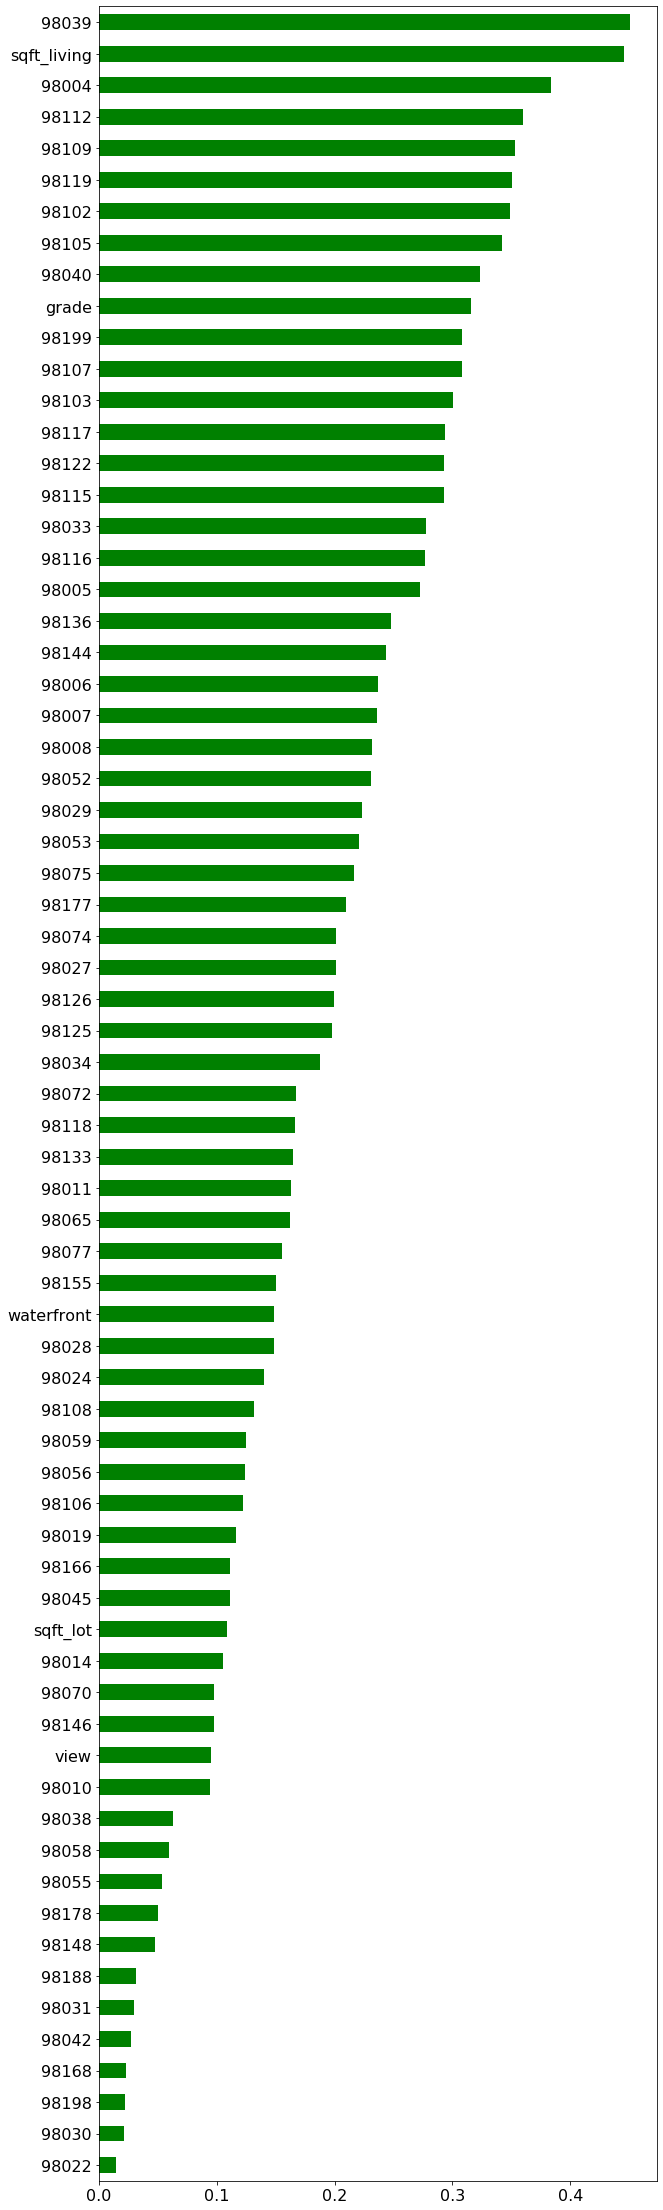

In [66]:
mpl.rcParams['figure.figsize'] = (10.0,40.0)
def coef_charts (model):
    
    main_features = model.params.to_frame()
    main_features.rename(columns={0:'coeffs'},inplace=True)
    main_features = main_features.sort_values('coeffs',ascending = False)
    main_features.drop('const',axis=0,inplace=True)     

    main_features['magnitude'] = abs(main_features['coeffs'])
    main_features['positive'] = main_features['coeffs'] < 0

    main_features.sort_values('magnitude',ascending=True,inplace=True)
        
    fig, ax = plt.subplots()
    #fig.figsize=(10.0,40.0)
    
    main_features['coeffs'].plot(kind='barh',color=main_features.positive.map({True: 'r', False: 'g'}),figure=fig,fontsize=16)
   
coef_charts(model)

mpl.rcParams['figure.figsize'] = (40.0,10.0)
plt.savefig('plot_images/coeff_chart')
   

We see that whether or not a house is in 98039 has a big effect on the price of a house. This makes sense given what know about 98039 i.e. its an expensive neighborhood where super rich people like Bill Gates and Jeff Bezos have homes. The next most significant features (except sqft_living) are all zipcodes that are close to the city center, as well as Mercer Island (98040), which again is in line with what we saw earlier. 

That chart is a little busy, mainly because of all the zipcode features. Lets remove those co-efifcients and chart the rest of the original features. 

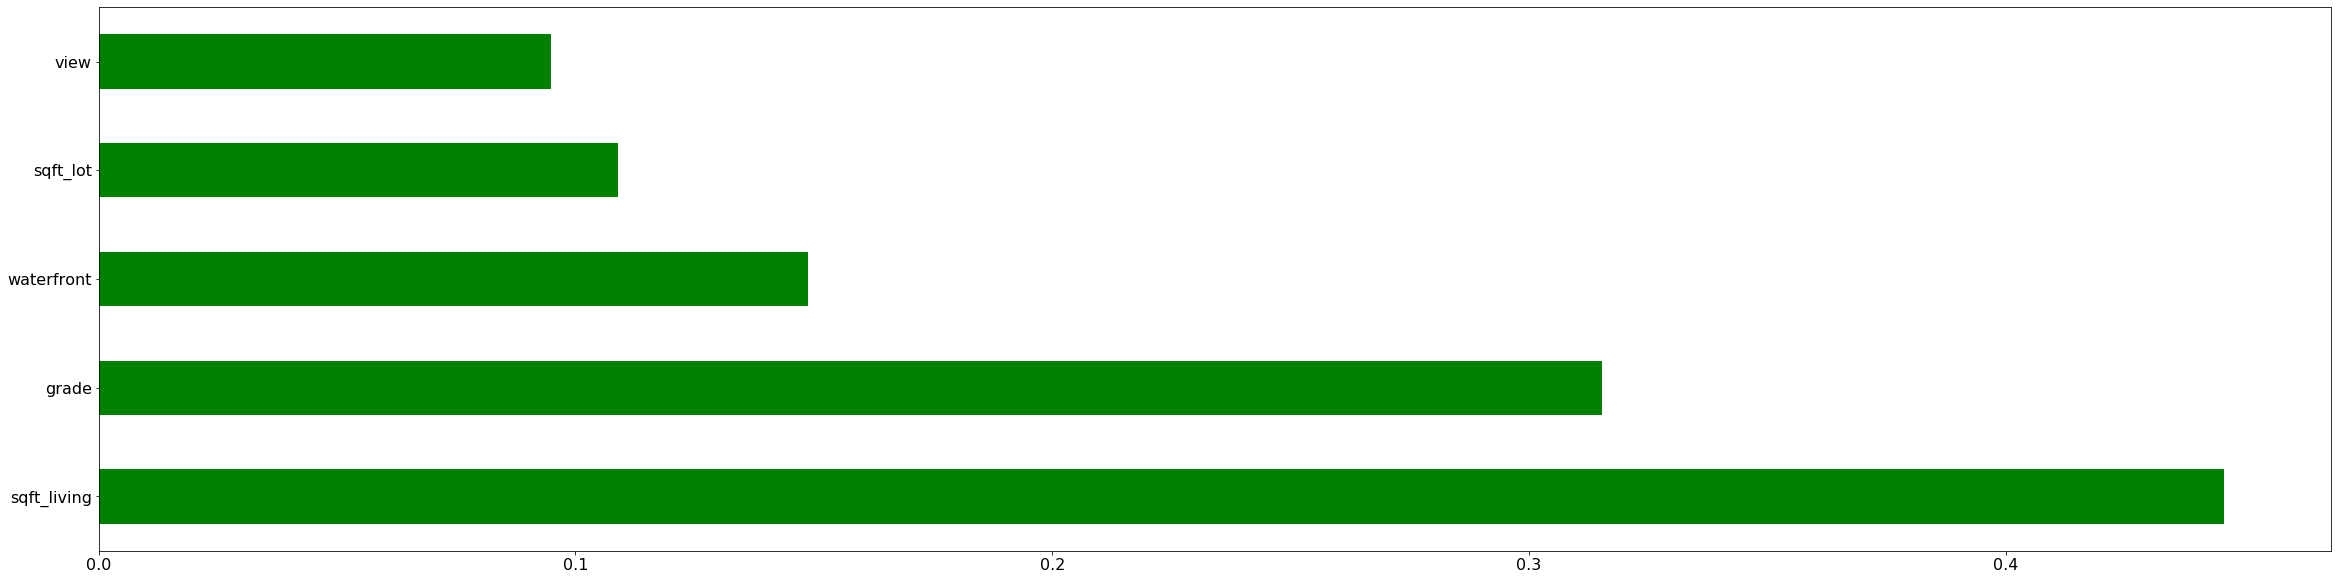

In [67]:
main_features = model.params.to_frame()
main_features.rename(columns={0:'coeffs'},inplace=True)
main_features.drop('const',axis=0,inplace=True)   

set1 = set(list(main_features.index))
set2 = set(list(df0.columns))
common = list(set1 & set2)

main_features['magnitude'] = abs(main_features['coeffs'])
main_features['positive'] = main_features['coeffs'] < 0

fig, ax = plt.subplots()

main_features = main_features.loc[common,:]
main_features.sort_values('magnitude',ascending=False,inplace=True)

main_features['coeffs'].plot(kind='barh',color=main_features.positive.map({True: 'r', False: 'g'}),figure=fig,fontsize=16)
plt.savefig('plot_images/orig_coeff_chart')


From this chart we can see that form our original feature set, square footage of living space has the largest impact on price. This seems in line with what we know about the fundamental mechanics of the real estate market. People are buying a place to live and the more living space per dollar they can get the higher they will be willing to pay.

Grade is the second most important feature, which makes sense because the grade system is probably meant to reflect the value of the house and is essentially an analogue version of our linear regression model.

We see that longitude has a strong negative correlation with price. This makes sense based on what we saw when we were exploring maps of our data; prices are higher closer to the city. Recall that longitude decreases as we move west, and the Seattle city center is on the western edge of King county. 

Whether or not a house has water frontage seems to have a significant impact as well, as does view. That makes sense given that we know from experience that such houses are in greater demand. We also saw on the map that the most expensive neighborhoods were next to the water. 

# CONCLUSIONS & RECOMMENDATIONS

Based on our analysis we can make the following conclusions:

Sellers looking to make profits from investing in property are probably better off buying houses towards the city center, and in neighborhood like Medina and Mercer Island. These have higher sales prices and thus, probably yield higher profits. Also, buying closer to the city would probably lead to more incrases in price, since the scarcity will only increase. 

Buyers are better off buying in the suburubs, especially if they want maximum living space for their money. They have options to choose between bigger houses or smaller yards; they can buy the zipcode that fits their needs. 
